#  ** Medical insurance cost prediction(Healthcare domain) **

##  #Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

## #Importing the insurance_data

In [3]:
insurance_data = pd.read_csv(r"C:\Data\insurance.csv")

insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance_data.head()

insurance_data.info()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
type(insurance_data)

insurance_data.columns

insurance_data['region'].unique()

insurance_data['sex'].unique()

pandas.core.frame.DataFrame

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

array(['female', 'male'], dtype=object)

## 1.Data_cleaning:

In [6]:
# cleaning for duplicates

insurance_data.duplicated().sum()

insurance_data.drop_duplicates(keep='first',inplace=True)

insurance_data.duplicated().sum()

1

0

In [7]:
insurance_data.describe()

insurance_data.corr()

insurance_data.isnull().sum()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### (a). Removing the outliers

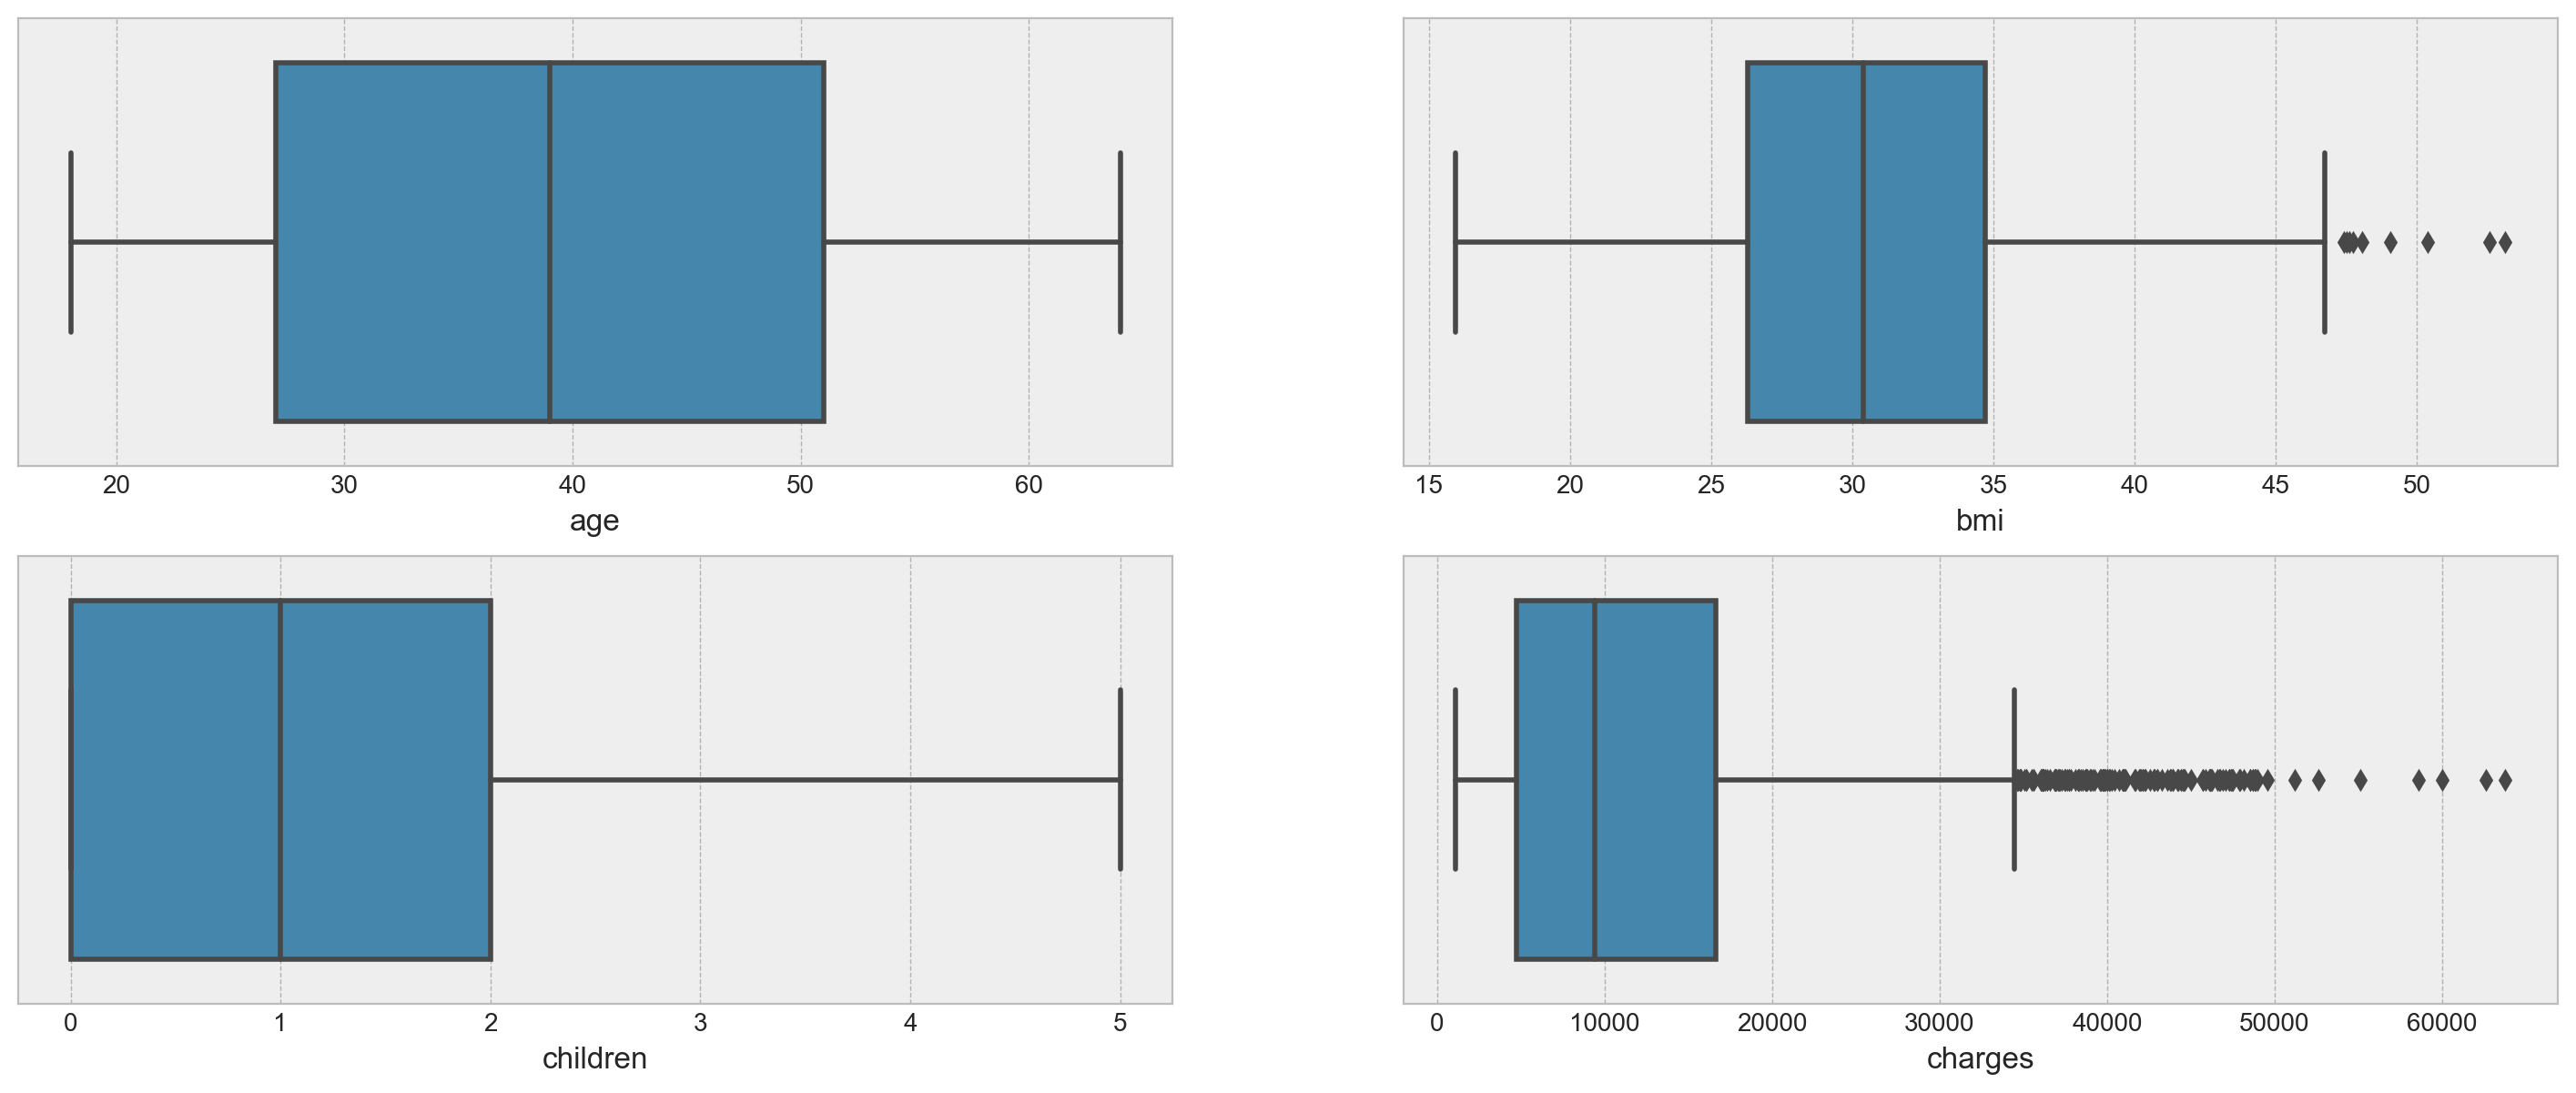

In [8]:
plt.figure(dpi=100, figsize=(18,15))

plt.subplot(421)
sns.boxplot(data=insurance_data,x='age')
            
plt.subplot(422)
sns.boxplot(data=insurance_data,x='bmi')
            
plt.subplot(423)
sns.boxplot(data=insurance_data,x='children')
            
plt.subplot(424)
sns.boxplot(data=insurance_data,x='charges');

26.29 30.4 34.7
8.410000000000004
47.31500000000001
13.674999999999994


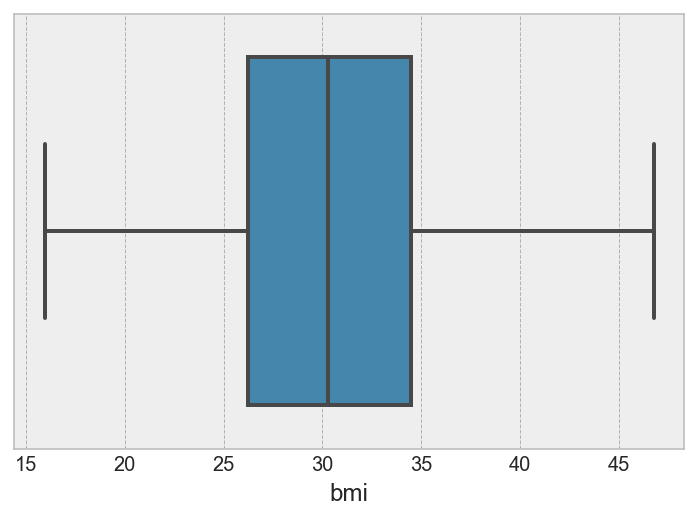

In [9]:
Q1,Q2,Q3 =tuple(insurance_data.bmi.quantile(q=[0.25,0.5,0.75]).values)
print(Q1,Q2,Q3)
insurance_data.bmi.median()
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR
print(IQR,UL,LL,sep='\n')


drop_index=insurance_data[(insurance_data.bmi>UL)].index
insurance_data=insurance_data.drop(drop_index,axis=0)
sns.boxplot(data=insurance_data,x='bmi');

4744.32505 9369.61575 16604.302645
11859.977595
34394.269037499995
-13045.6413425


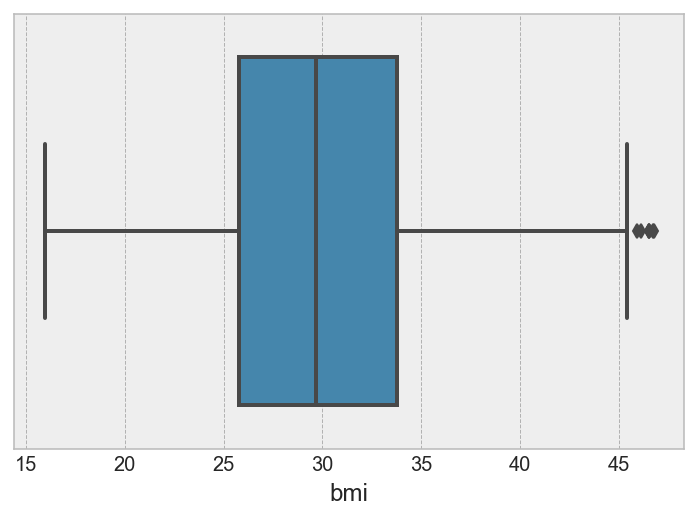

In [10]:
Q1,Q2,Q3 =tuple(insurance_data.charges.quantile(q=[0.25,0.5,0.75]).values)
print(Q1,Q2,Q3)
insurance_data.charges.median()
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR
print(IQR,UL,LL,sep='\n')


drop_index=insurance_data[(insurance_data.charges>UL)].index
insurance_data=insurance_data.drop(drop_index,axis=0)
sns.boxplot(data=insurance_data,x='bmi');

## 2. Insurance Data_Analysis:

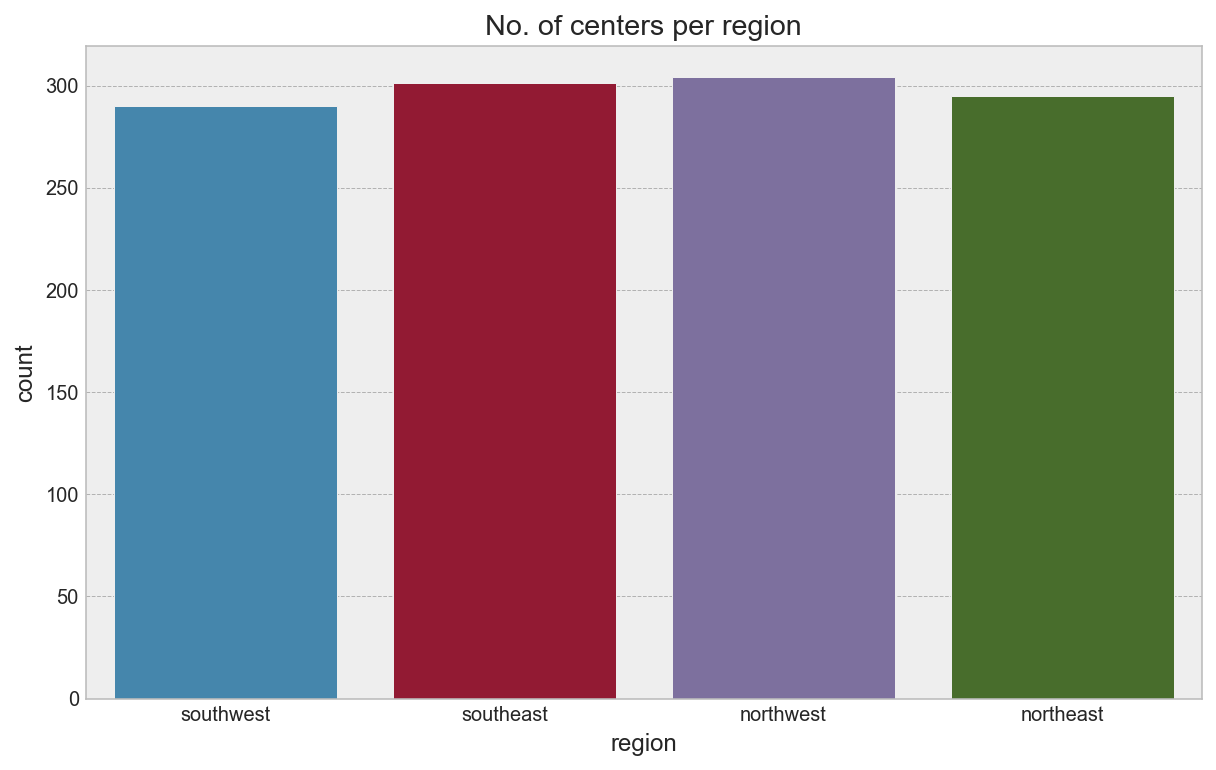

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x = "region", data = insurance_data)
plt.title("No. of centers per region")
plt.show;

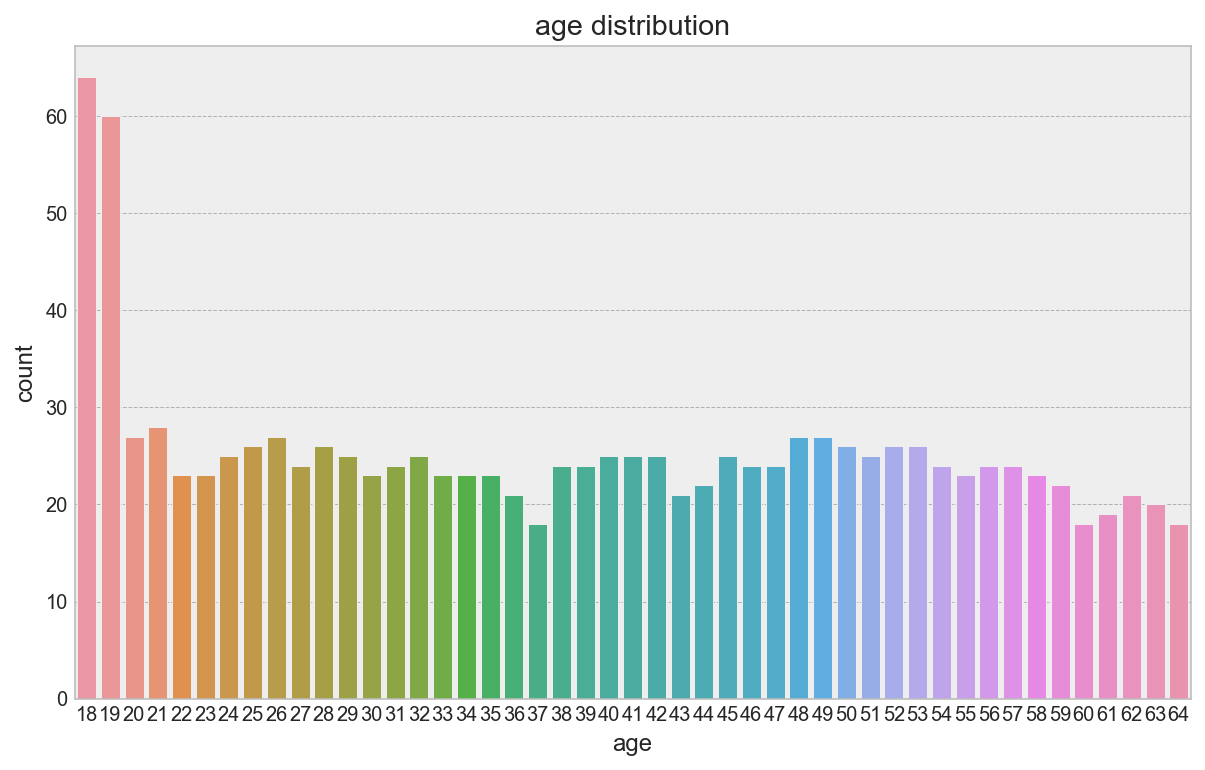

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x = "age", data = insurance_data)
plt.title("age distribution")
plt.show;

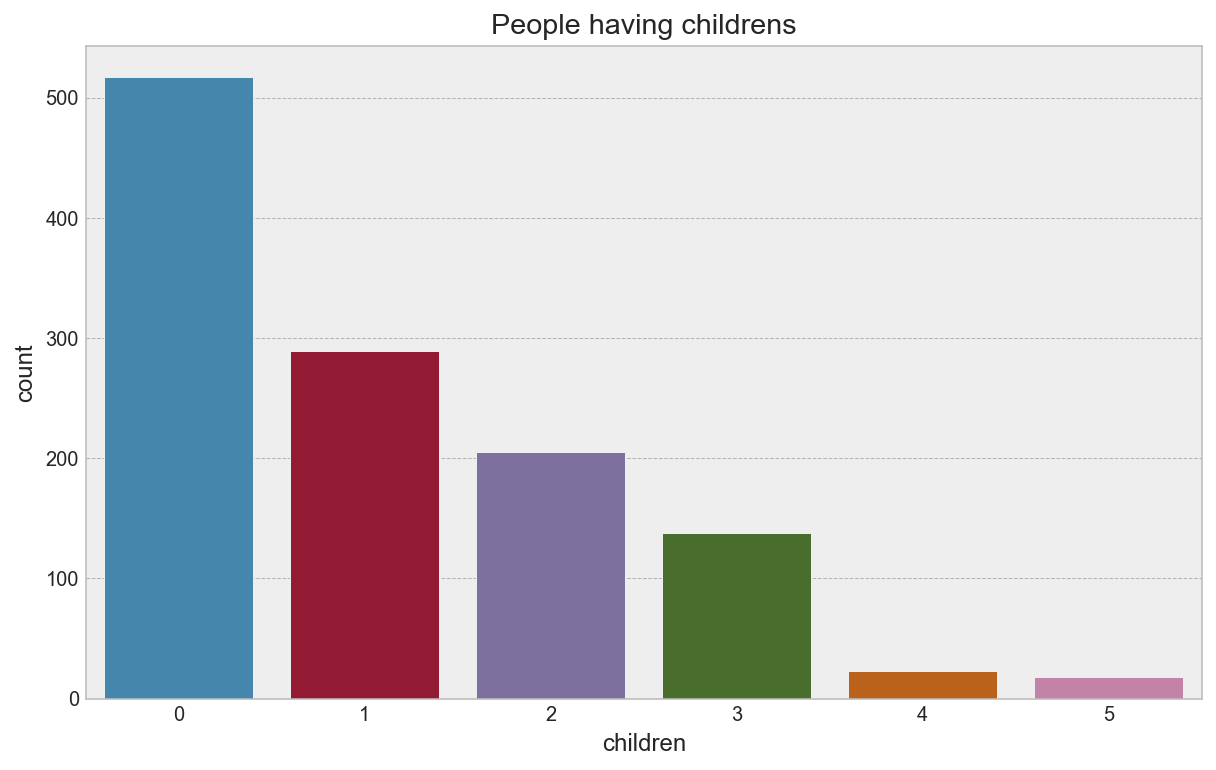

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x = "children", data = insurance_data)
plt.title("People having childrens")
plt.show;

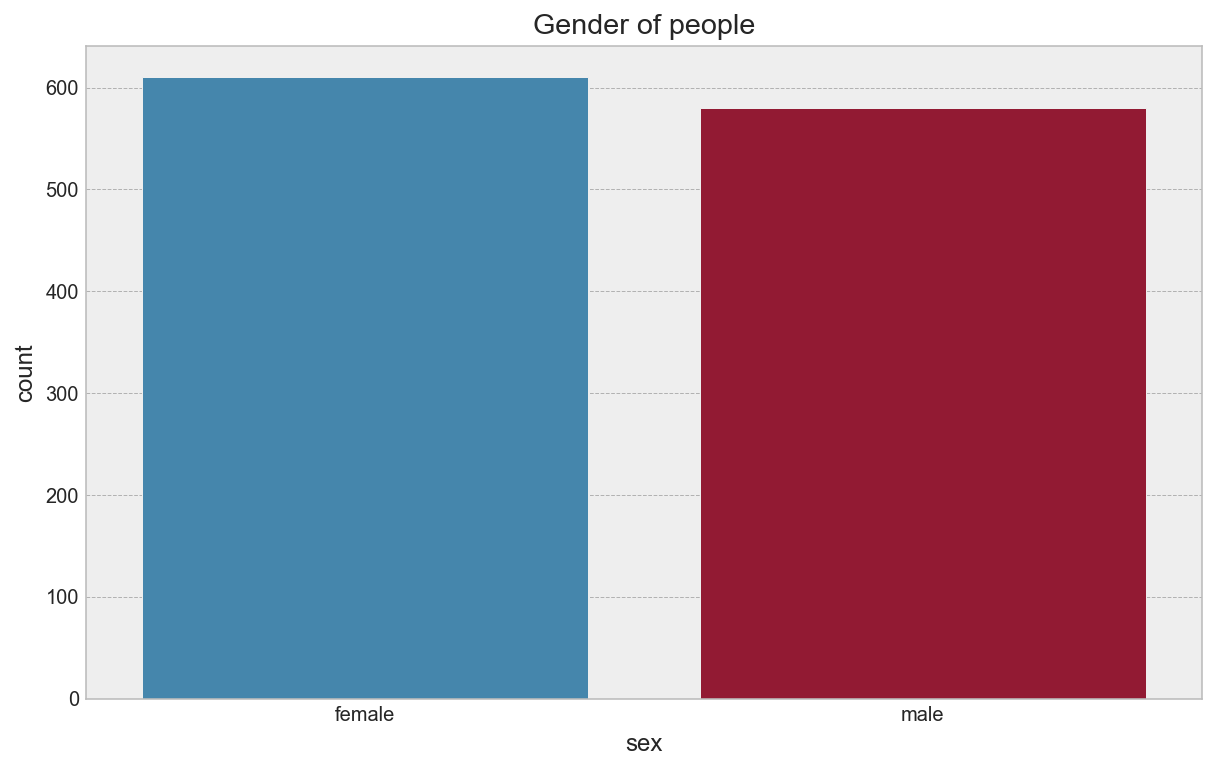

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x = "sex", data = insurance_data)
plt.title("Gender of people")
plt.show;

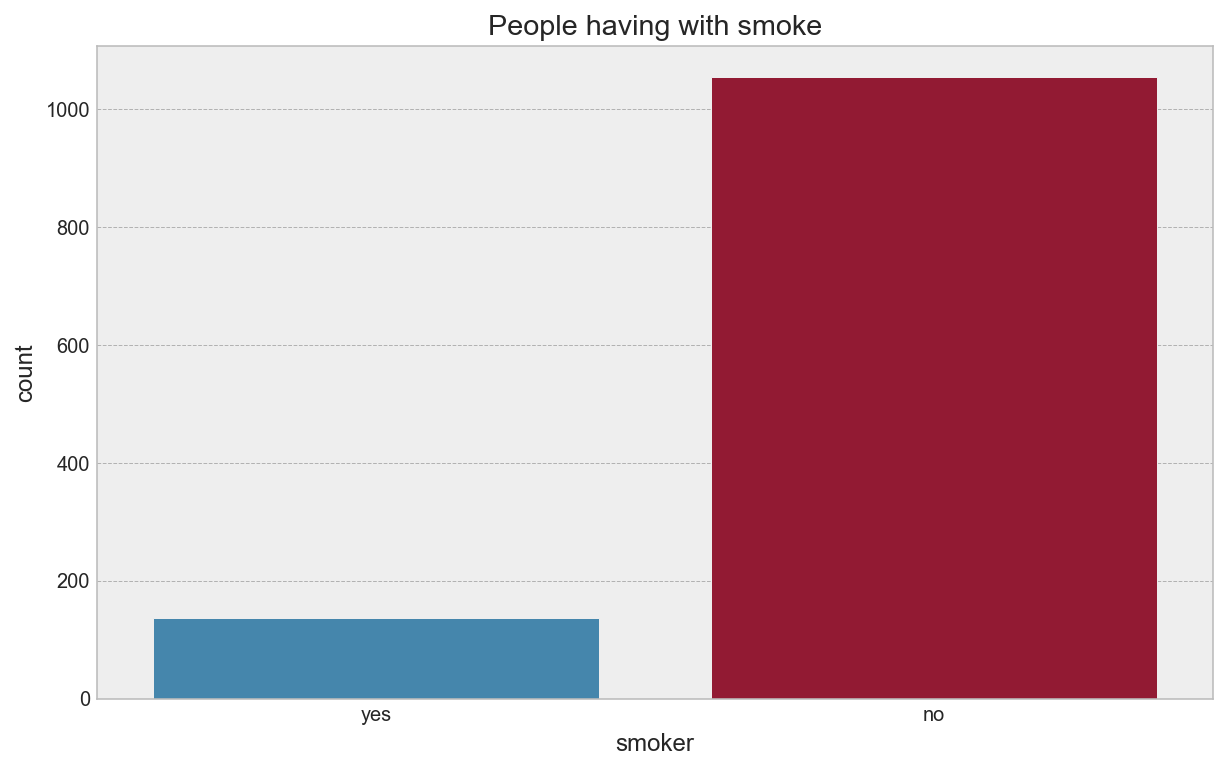

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x = "smoker", data = insurance_data)
plt.title("People having with smoke")
plt.show;

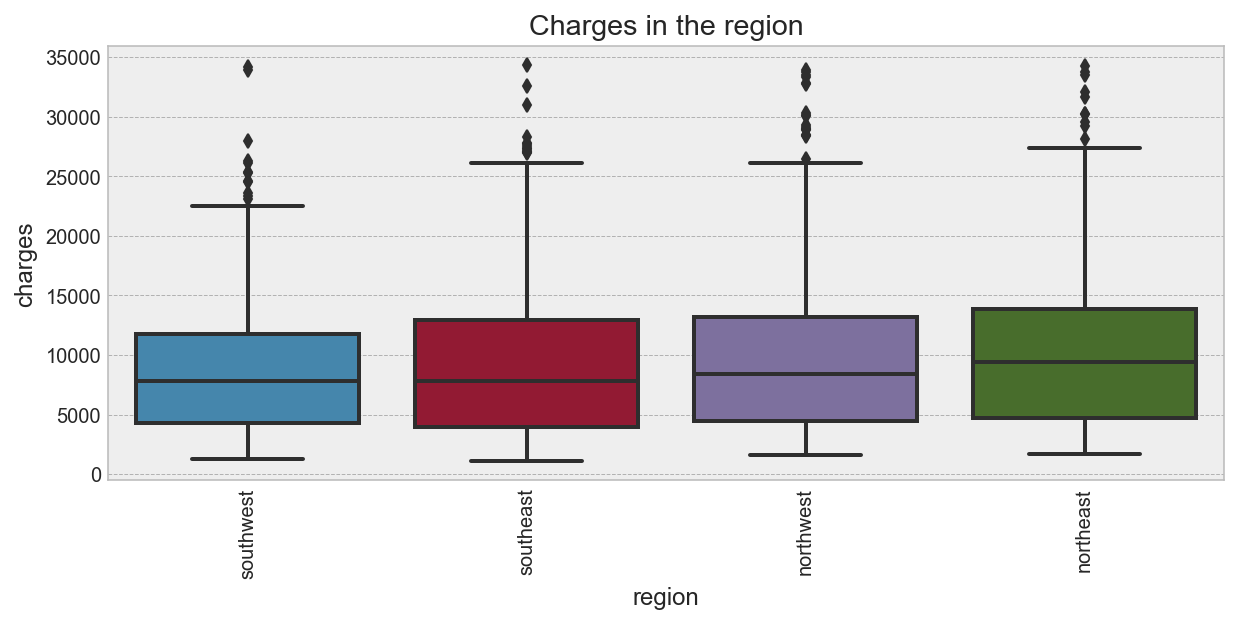

In [16]:
plt.figure(figsize=(10,4)) 
sns.boxplot(x="region", y="charges", data=insurance_data)
plt.title('Charges in the region')
plt.ylabel('charges')
plt.xlabel('region')
plt.xticks(rotation = 90)
plt.show();

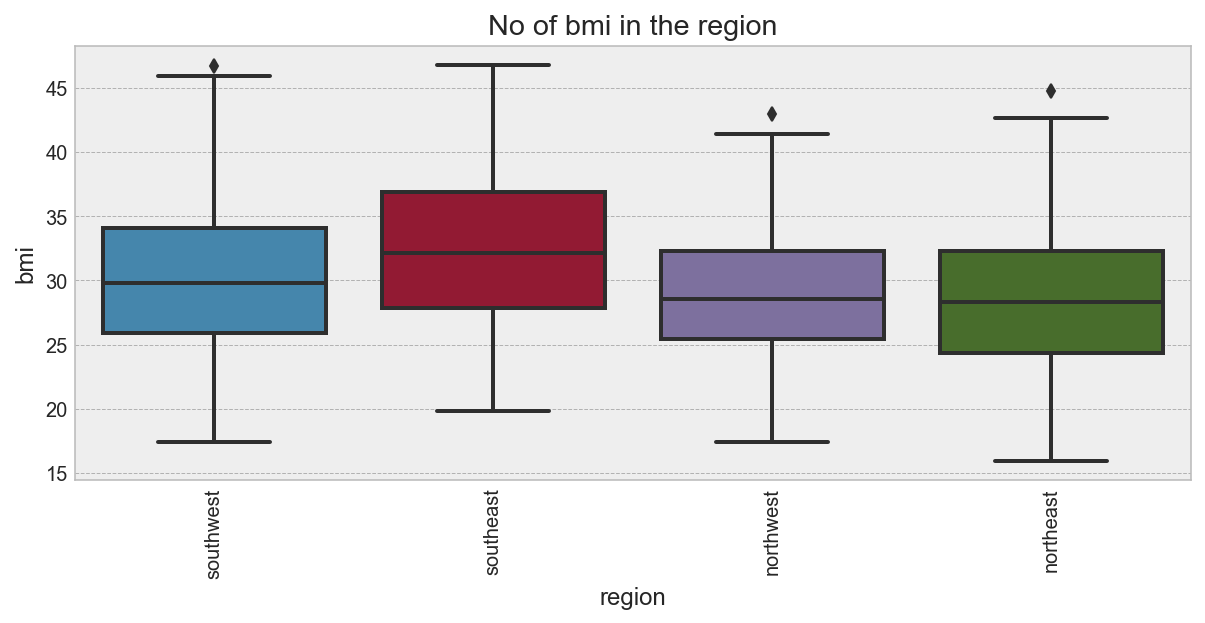

In [17]:
plt.figure(figsize=(10,4)) 
sns.boxplot(x="region", y="bmi", data=insurance_data)
plt.title('No of bmi in the region')
plt.ylabel('bmi')
plt.xlabel('region')
plt.xticks(rotation = 90)
plt.show();

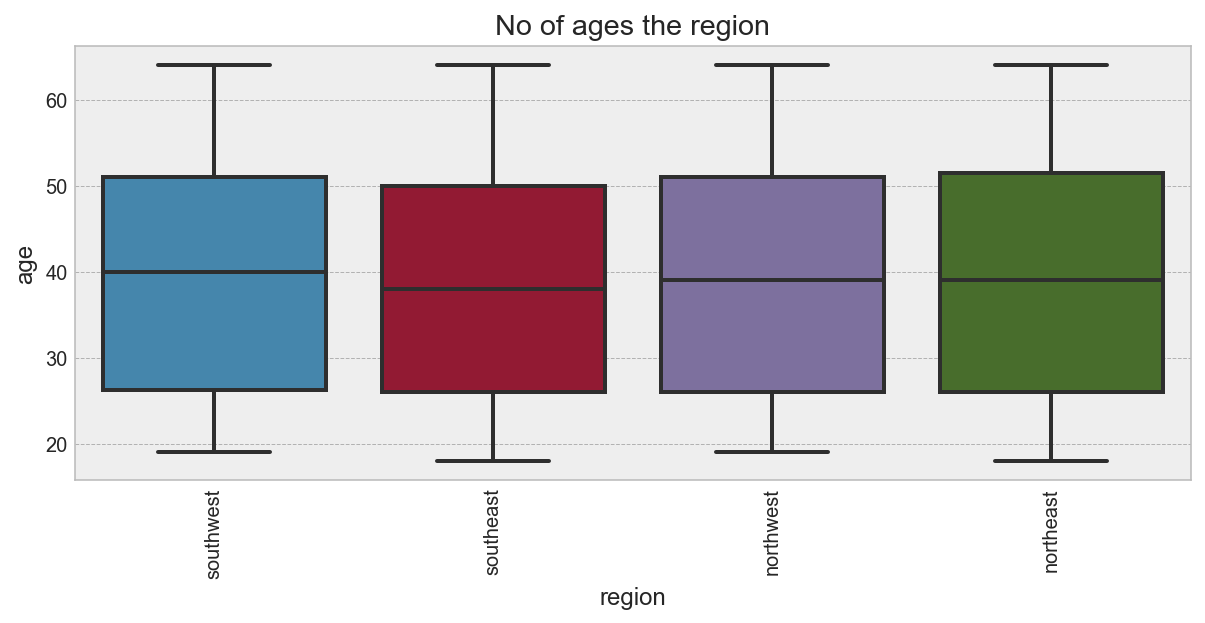

In [18]:
plt.figure(figsize=(10,4)) 
sns.boxplot(x="region", y="age", data=insurance_data)
plt.title('No of ages the region')
plt.ylabel('age')
plt.xlabel('region')
plt.xticks(rotation = 90)
plt.show();

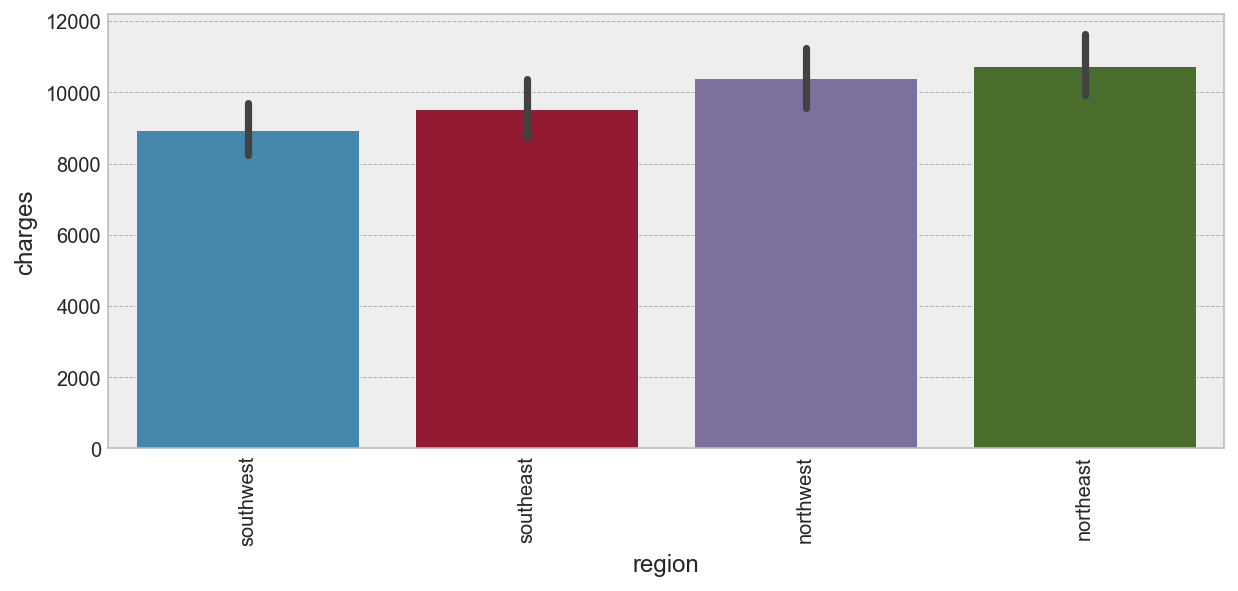

In [19]:
plt.figure(figsize=(10,4)) 
sns.barplot(x='region', y='charges', data=insurance_data)
plt.xticks(rotation = 90)
plt.show();

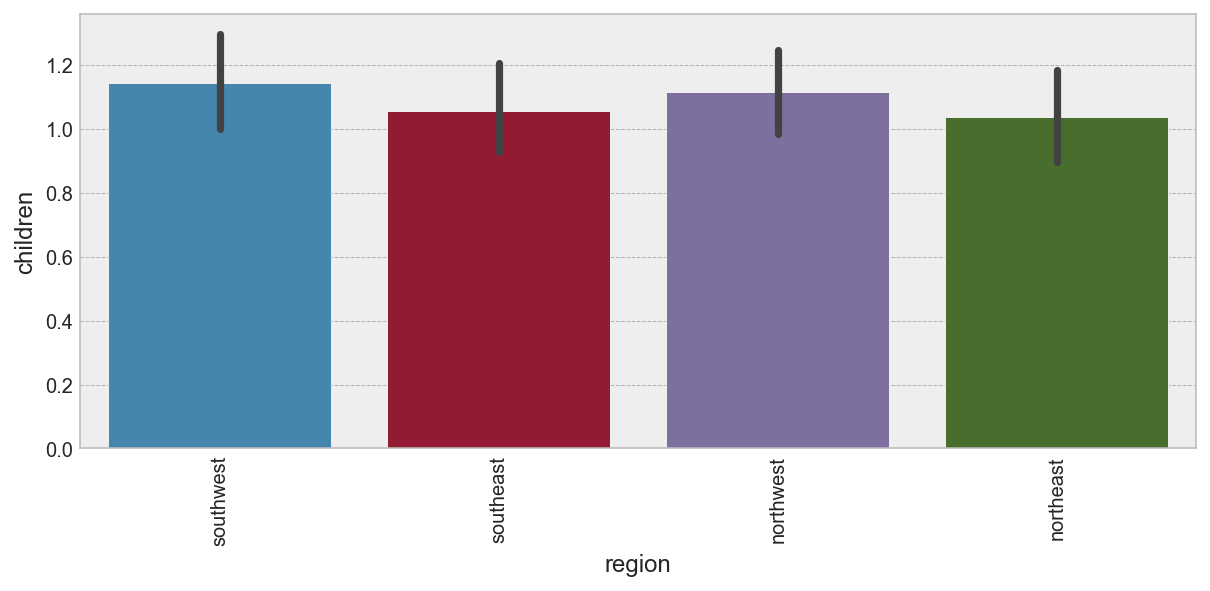

In [20]:
plt.figure(figsize=(10,4)) 
sns.barplot(x='region', y='children', data=insurance_data)
plt.xticks(rotation = 90)
plt.show();

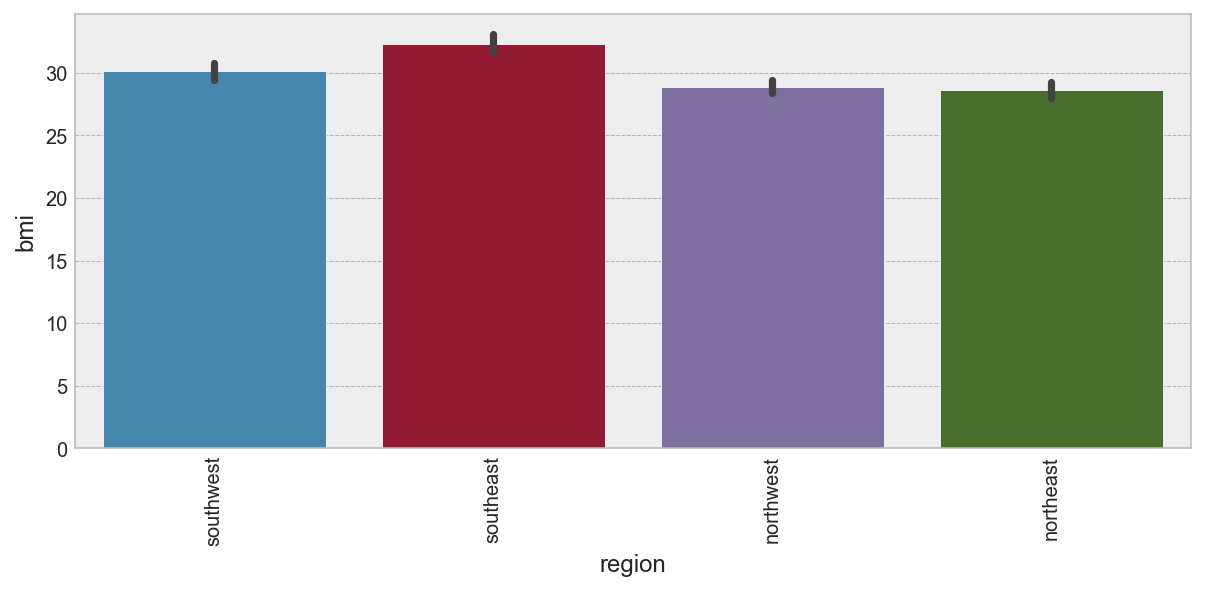

In [21]:
plt.figure(figsize=(10,4)) 
sns.barplot(x='region', y='bmi', data=insurance_data)
plt.xticks(rotation = 90)
plt.show();

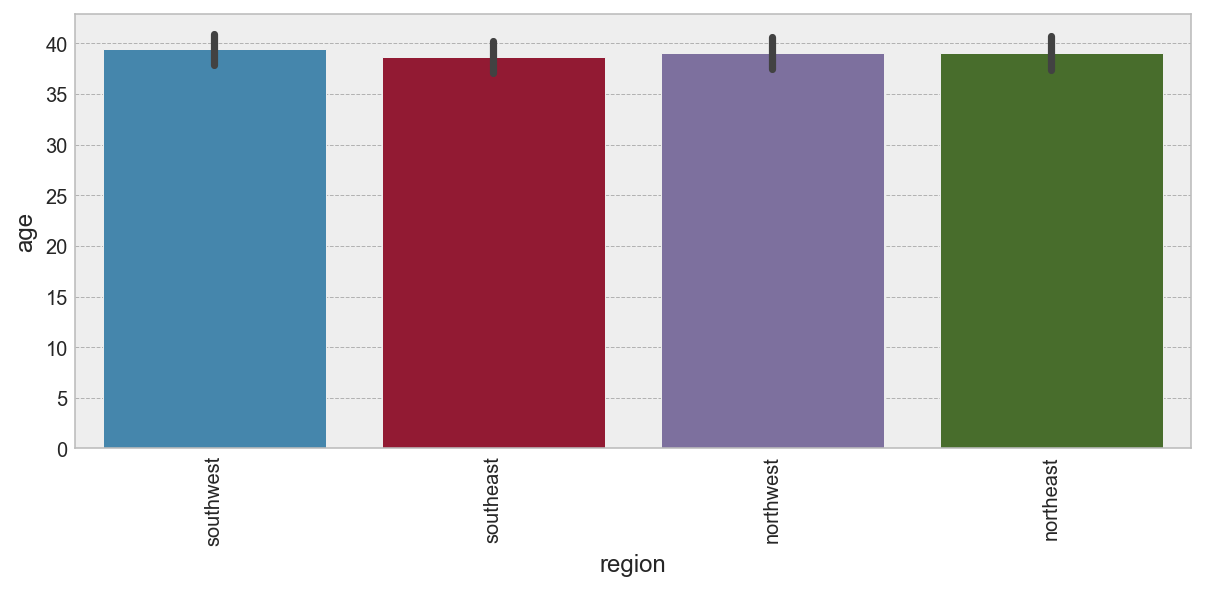

In [22]:
plt.figure(figsize=(10,4)) 
sns.barplot(x='region', y='age', data=insurance_data)
plt.xticks(rotation = 90)
plt.show();

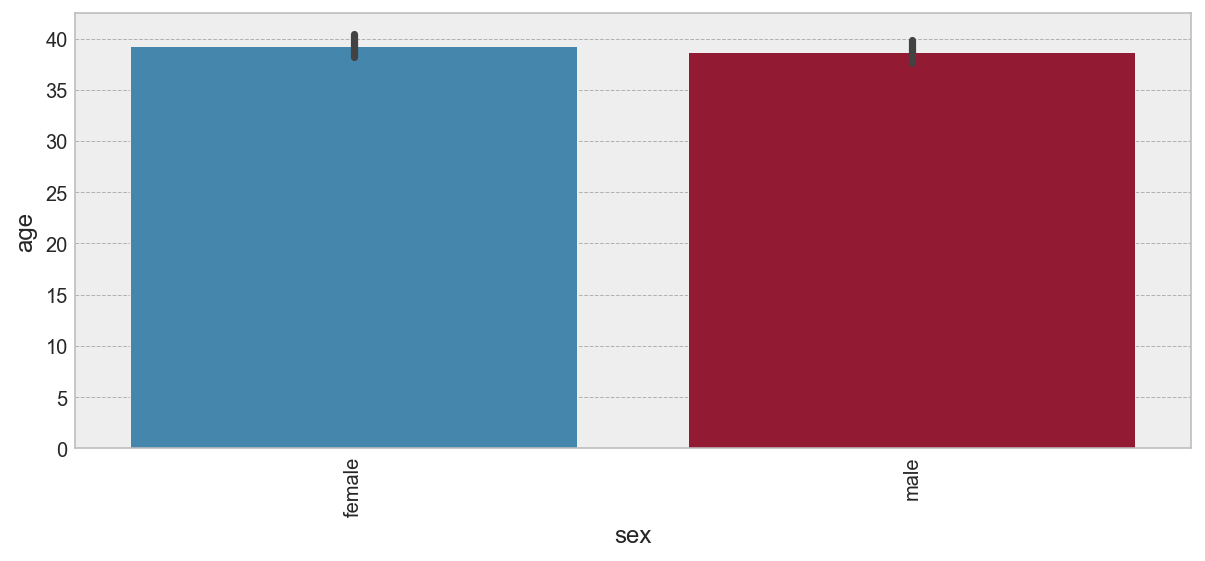

In [23]:
plt.figure(figsize=(10,4)) 
sns.barplot(x='sex', y='age', data=insurance_data)
plt.xticks(rotation = 90)
plt.show();

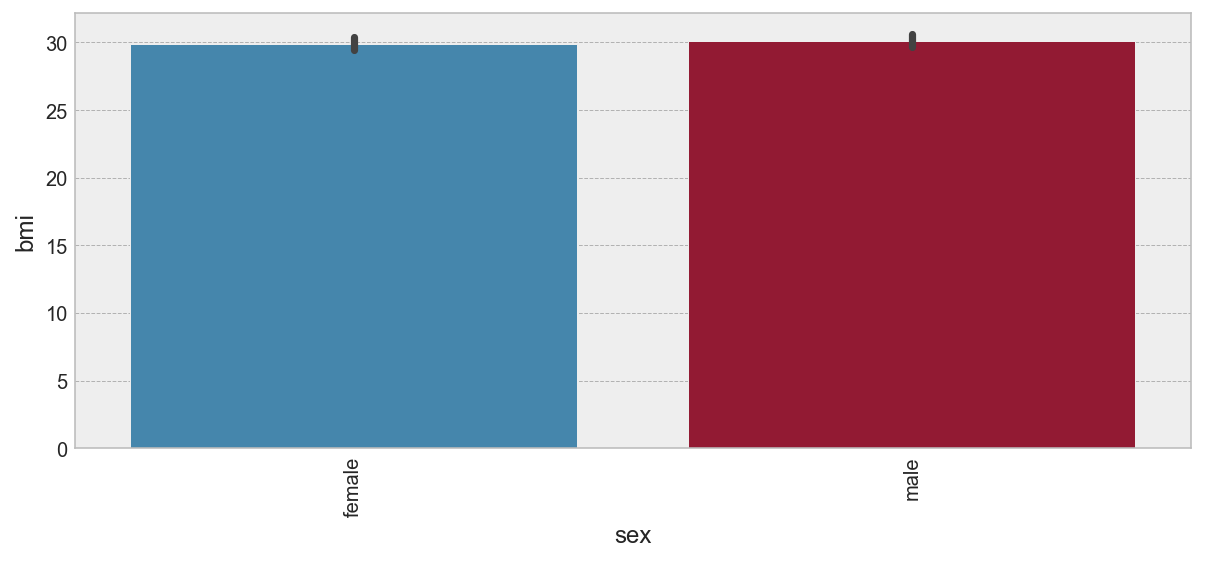

In [24]:
plt.figure(figsize=(10,4)) 
sns.barplot(x='sex', y='bmi', data=insurance_data)
plt.xticks(rotation = 90)
plt.show();

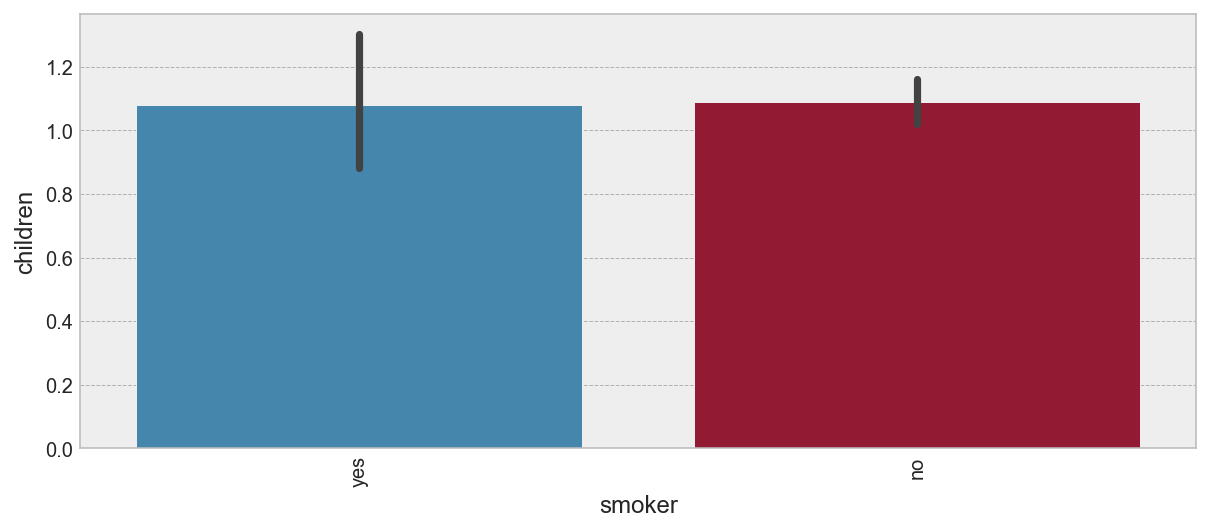

In [25]:
plt.figure(figsize=(10,4)) 
sns.barplot(x='smoker', y='children', data=insurance_data)
plt.xticks(rotation = 90)
plt.show();

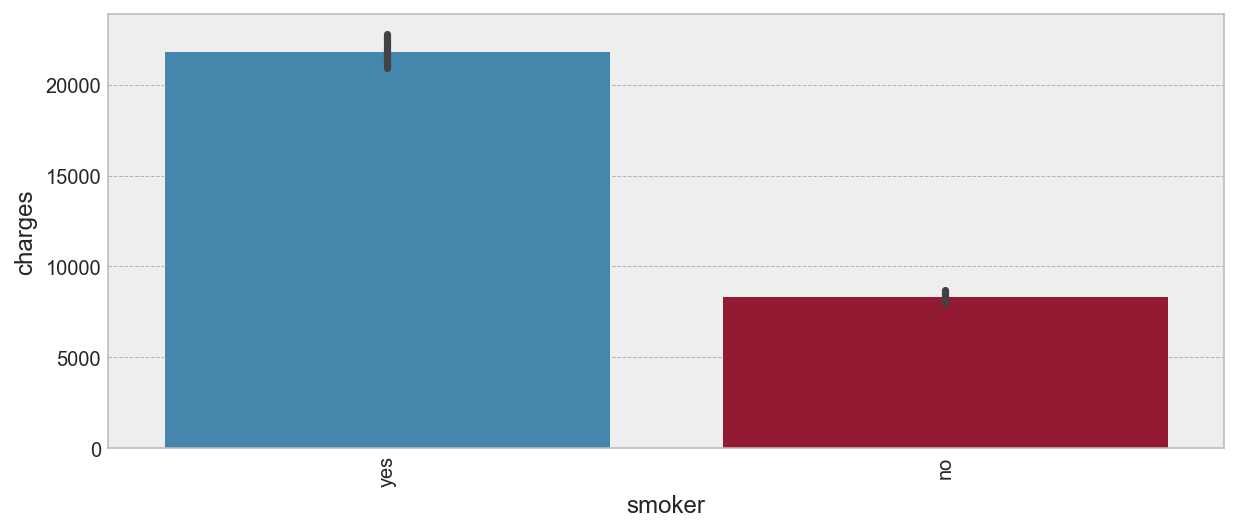

In [26]:
plt.figure(figsize=(10,4)) 
sns.barplot(x='smoker', y='charges', data=insurance_data)
plt.xticks(rotation = 90)
plt.show();

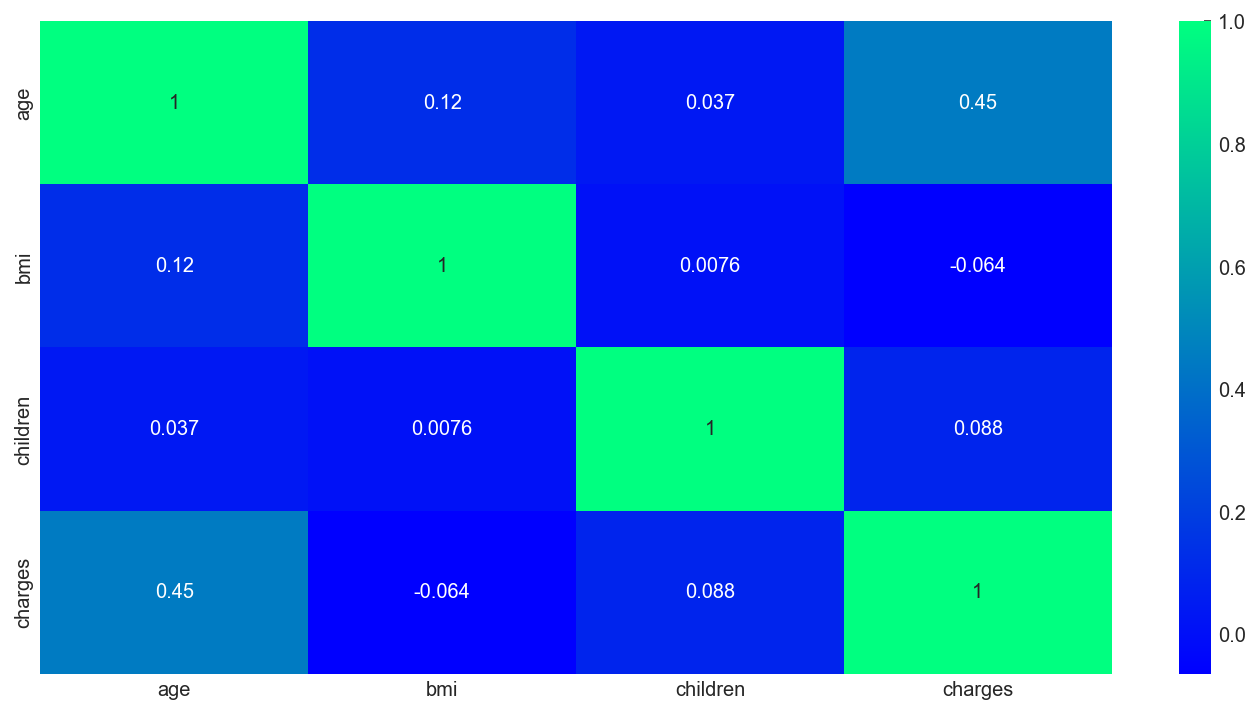

In [27]:
plt.figure(figsize=(12,6))    #Very useful plot to check correlation between numerical values 
sns.heatmap(insurance_data.corr(), cmap = 'winter', annot=True); 
plt.show();

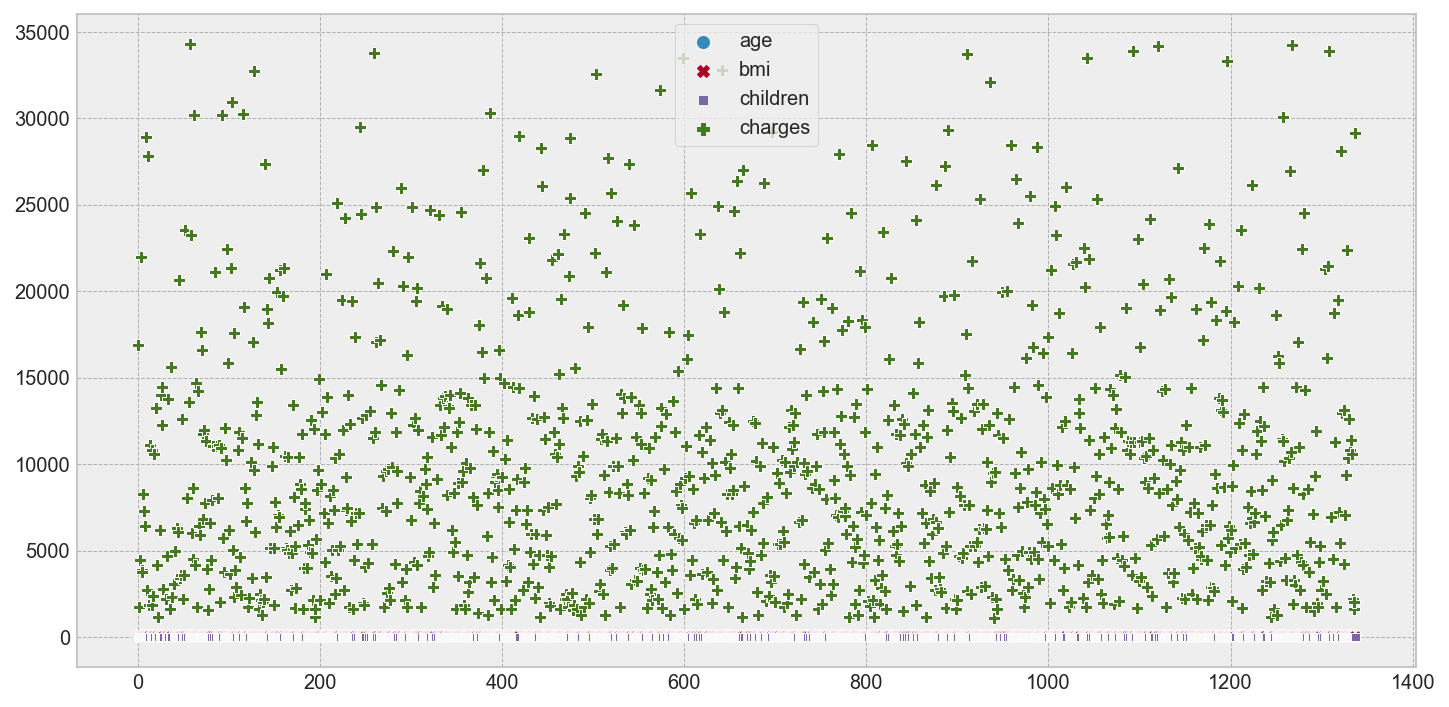

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=insurance_data);

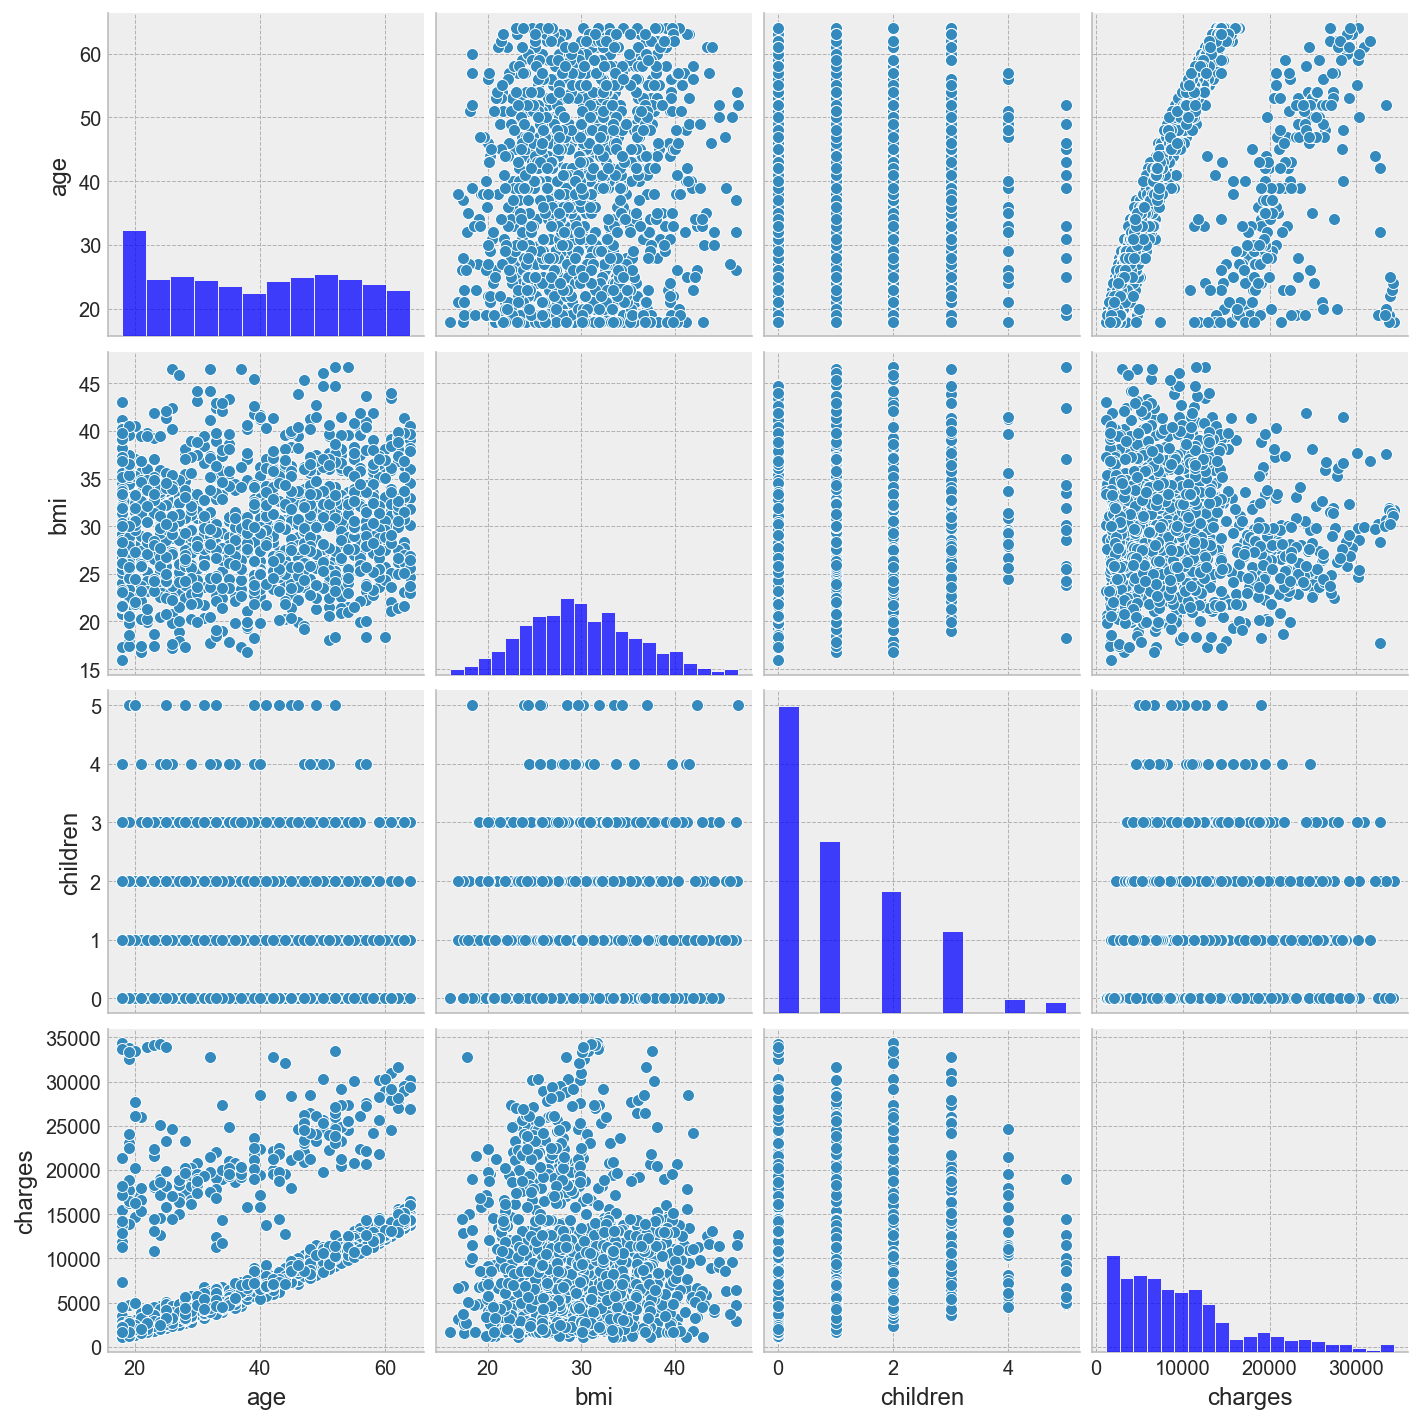

In [29]:
sns.pairplot(insurance_data);

## 3. Machine learning model problem statement:-

**Bulding a model which can predict the charges(prices) of each an individual on the basic of their records in the        insurance_data set like ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'].**

  + **Target_variable is--->   `charges(prices).`**

In [30]:
insurance_data.shape

(1190, 7)

## # Data Prepration:

### (a).  Identify the Target Variable and Splitting the Data into Train and Test

In [31]:
# Identifying the inputs (X) and output (y)

X = insurance_data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

y = insurance_data['charges']

X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [32]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [33]:
# Data-preprocessing: Train & Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(833, 6) (833,)
(357, 6) (357,)


### (b). Separating Categorical and Numerical Columns:

In [34]:
X_train.head()

,age,sex,bmi,children,smoker,region
1108,26,male,30.000,1,no,southwest
1332,52,female,44.700,3,no,southwest
249,29,male,28.975,1,no,northeast
194,18,male,34.430,0,no,southeast
562,27,male,30.500,0,no,southwest


In [35]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [36]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,sex,smoker,region
1108,male,no,southwest
1332,female,no,southwest
249,male,no,northeast
194,male,no,southeast
562,male,no,southwest


In [37]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,age,bmi,children
1108,26,30.000,1
1332,52,44.700,3
249,29,28.975,1
194,18,34.430,0
562,27,30.500,0


### (c). Scaling the Numerical Features

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),   
                                    columns = X_train_num.columns,        
                                    index = X_train_num.index)

In [39]:
X_train_num_rescaled.head()

X_train_num_rescaled.describe()

X_train_num_rescaled.corr()

,age,bmi,children
1108,-0.948297,0.004442,-0.023578
1332,0.909861,2.489825,1.684274
249,-0.733894,-0.168859,-0.023578
194,-1.520038,0.753438,-0.877503
562,-0.876829,0.088979,-0.877503


,age,bmi,children
count,8.330000e+02,8.330000e+02,8.330000e+02
mean,7.497004e-17,-1.211516e-16,1.887246e-16
std,1.000601e+00,1.000601e+00,1.000601e+00
min,-1.520038e+00,-2.369353e+00,-8.775034e-01
25%,-8.768293e-01,-7.225749e-01,-8.775034e-01
50%,-1.921818e-02,-5.642454e-02,-2.357778e-02
75%,8.383929e-01,6.342415e-01,8.303479e-01
max,1.767472e+00,2.836426e+00,3.392125e+00


,age,bmi,children
age,1.000000,0.119348,0.003210
bmi,0.119348,1.000000,0.011989
children,0.003210,0.011989,1.000000


In [40]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 3
Mean of each column: [39.26890756 29.97372749  1.02761104]
Std of each column: [13.9923562   5.91458071  1.17106212]


### (d). Applying OneHotEncoding on Categorical Columns

In [41]:
X_train_cat['sex'].value_counts(normalize=True)

female    0.513806
male      0.486194
Name: sex, dtype: float64

In [42]:
X_train_cat['smoker'].value_counts(normalize=True)

no     0.885954
yes    0.114046
Name: smoker, dtype: float64

In [43]:
X_train_cat['region'].value_counts(normalize=True)

northeast    0.255702
southeast    0.253301
northwest    0.246098
southwest    0.244898
Name: region, dtype: float64

In [44]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder
encoder_ = OneHotEncoder(sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

In [45]:
X_train_cat_ohe.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1108,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1332,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
249,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
194,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
562,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [46]:
encoder_.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

### (e).Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [47]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1108,-0.948297,0.004442,-0.023578,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1332,0.909861,2.489825,1.684274,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
249,-0.733894,-0.168859,-0.023578,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
194,-1.520038,0.753438,-0.877503,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
562,-0.876829,0.088979,-0.877503,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


### (f).Preparing Test Data

In [48]:
X_test.head()

X_test.info()

,age,sex,bmi,children,smoker,region
1329,52,male,38.600,2,no,southwest
688,47,female,24.100,1,no,southwest
136,19,male,34.100,0,no,southwest
890,64,female,26.885,0,yes,northwest
470,27,male,32.670,0,no,southeast


<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 1329 to 617
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       357 non-null    int64  
 1   sex       357 non-null    object 
 2   bmi       357 non-null    float64
 3   children  357 non-null    int64  
 4   smoker    357 non-null    object 
 5   region    357 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 19.5+ KB


In [49]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,sex,smoker,region
1329,male,no,southwest
688,female,no,southwest
136,male,no,southwest
890,female,yes,northwest
470,male,no,southeast


In [50]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,age,bmi,children
1329,52,38.600,2
688,47,24.100,1
136,19,34.100,0
890,64,26.885,0
470,27,32.670,0


In [51]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,age,bmi,children
1329,0.909861,1.458476,0.830348
688,0.552523,-0.993093,-0.023578
136,-1.448570,0.697644,-0.877503
890,1.767472,-0.522223,-0.877503
470,-0.876829,0.455869,-0.877503


In [52]:
X_test_cat_ohe = pd.DataFrame(encoder_.transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

In [53]:
X_test_cat_ohe.head()

encoder_.categories_

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1329,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
688,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
136,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
890,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
470,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [54]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1329,0.909861,1.458476,0.830348,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
688,0.552523,-0.993093,-0.023578,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
136,-1.448570,0.697644,-0.877503,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
890,1.767472,-0.522223,-0.877503,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
470,-0.876829,0.455869,-0.877503,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


## # Buldinig model by using algorithims:

### (a).Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [56]:
# Prediction
y_test_pred = regressor.predict(X_test_transformed)

y_test_pred

array([11397.05073088,  9181.00689037,  2172.3771915 , 28431.74216933,
        4530.29785681, 12154.1355747 ,  2900.66226813, 14261.20807667,
       15527.84316243, 11478.66234353,  6261.46115676,  6518.4738169 ,
        6786.34054903, 11919.26389767,  3993.7800937 ,  3624.2928076 ,
        7079.71653801, 11089.95488554, 13103.66327713,  6583.17715107,
        5068.30677627, 17713.58985221,  1530.36028371, 11651.05960001,
       17512.46912408,  4693.67088232,  3830.68198049, 10666.93949727,
        8400.49224643,  3791.96171543,  3801.03898469, 12797.41569055,
       21263.82105605,  7341.74999114,  3216.84361613,  6261.15097485,
       12642.46098594,  8206.31945262,  7134.05353407, 23791.54902975,
        4409.68297512, 23773.34946495, 14761.78381177, 23070.7349586 ,
        9073.86788639,  5790.1837317 ,  5466.09472084,  4997.39403712,
        8287.11393455,  4795.04730143,  9518.94575516,  3384.64617601,
        9625.79248786,  2634.41671744, 11445.61942203, 14020.77135806,
      

In [57]:
Result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

Result_df.head()

,Actual,Predicted
1329,10325.20600,11397.050731
688,26236.57997,9181.006890
136,1261.44200,2172.377192
890,29330.98315,28431.742169
470,2497.03830,4530.297857


In [58]:
Result_df.shape

y_test.shape

Result_df.info()

(357, 2)

(357,)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 1329 to 617
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     357 non-null    float64
 1   Predicted  357 non-null    float64
dtypes: float64(2)
memory usage: 8.4 KB


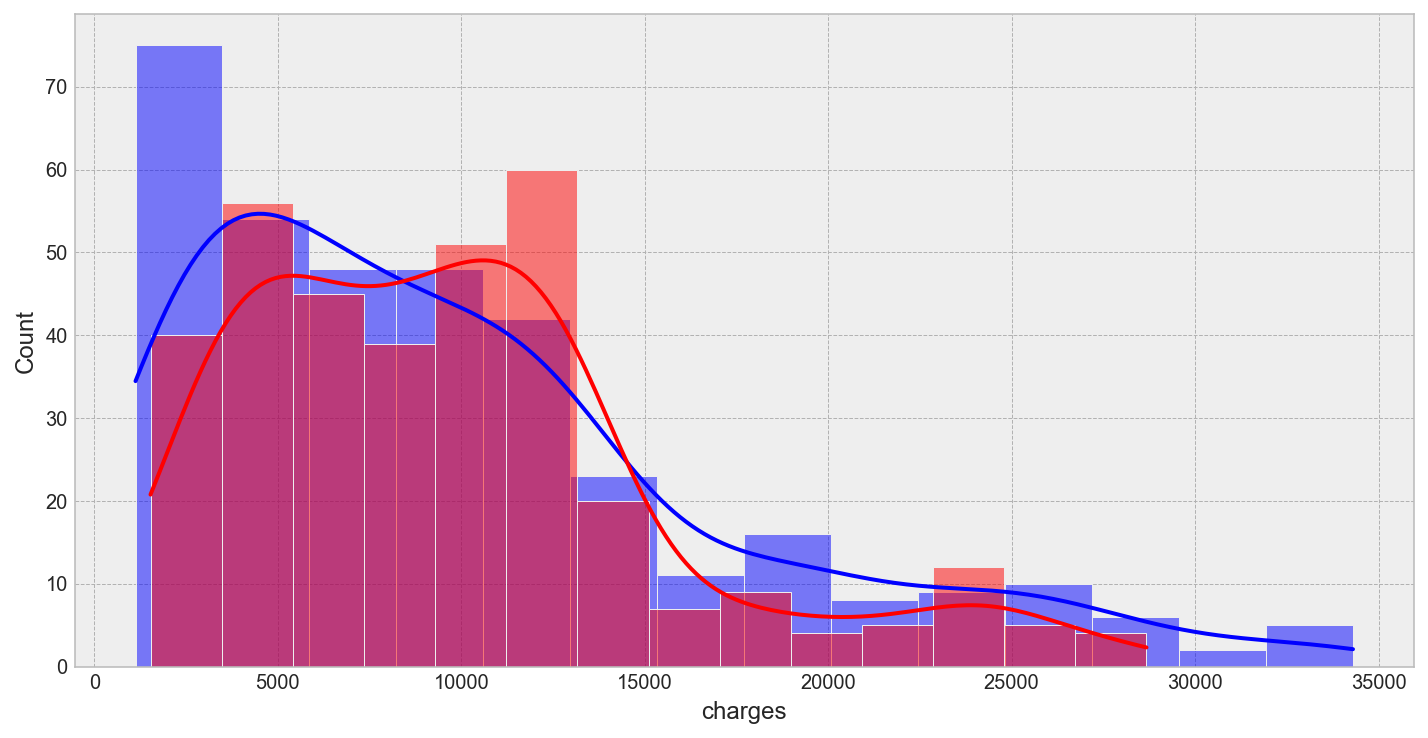

In [59]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [60]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2495.6782802755147
Mean Squared Error:  21643824.92176794
Root Mean Squared Error:  4652.2924372579955


### (b). Decision Tree Regression

In [61]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [62]:
# Prediction
y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1329,10325.20600,10806.8390
688,26236.57997,8539.6710
136,1261.44200,1261.8590
890,29330.98315,28950.4692
470,2497.03830,2494.0220


In [63]:
Result_df.shape

y_test.shape

Result_df.info()

(357, 2)

(357,)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 1329 to 617
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     357 non-null    float64
 1   Predicted  357 non-null    float64
dtypes: float64(2)
memory usage: 8.4 KB


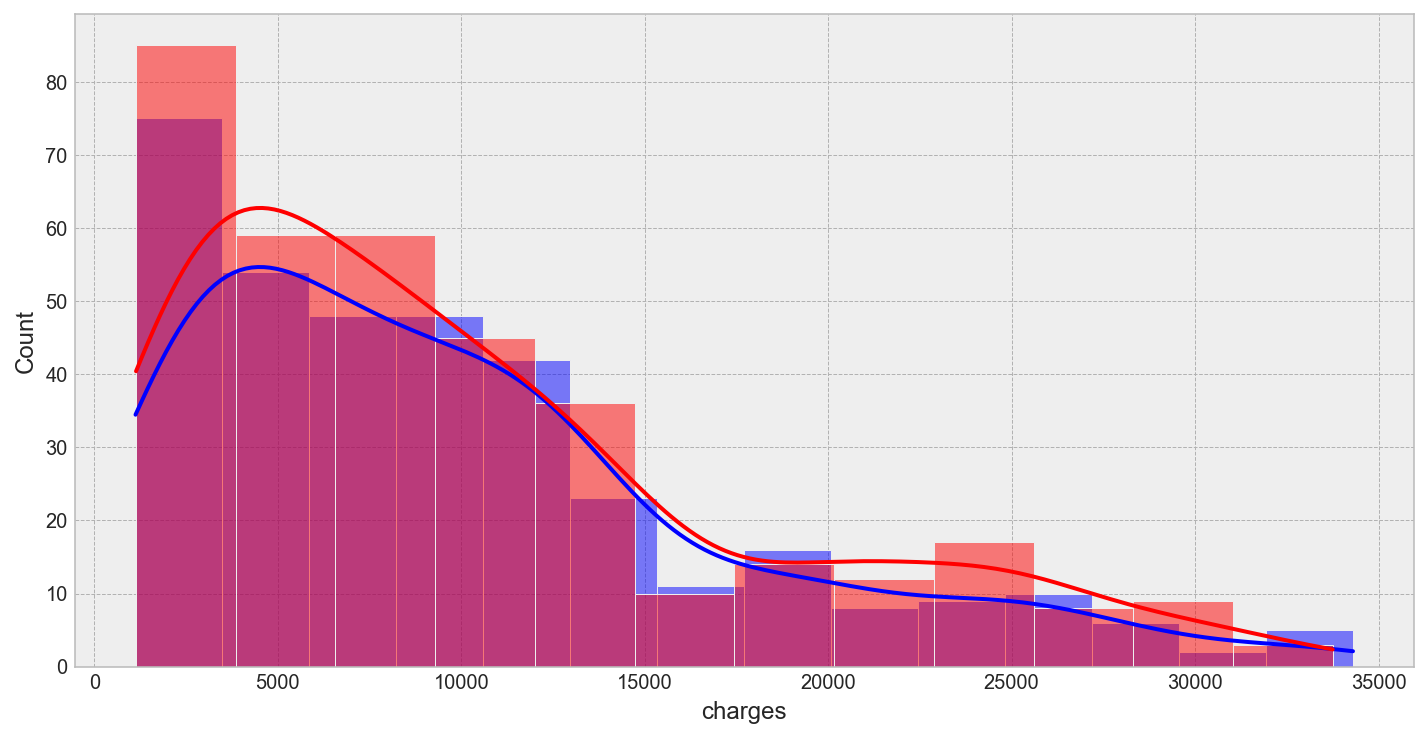

In [64]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [65]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2911.3162278963587
Mean Squared Error:  42527387.31208796
Root Mean Squared Error:  6521.302577866477


### (c). KNN Regression

In [66]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [67]:
# Prediction
y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1329,10325.20600,9786.524400
688,26236.57997,11957.840860
136,1261.44200,5678.134866
890,29330.98315,24382.892690
470,2497.03830,4691.705202


In [68]:
Result_df.shape

y_test.shape

Result_df.info()

(357, 2)

(357,)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 1329 to 617
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     357 non-null    float64
 1   Predicted  357 non-null    float64
dtypes: float64(2)
memory usage: 8.4 KB


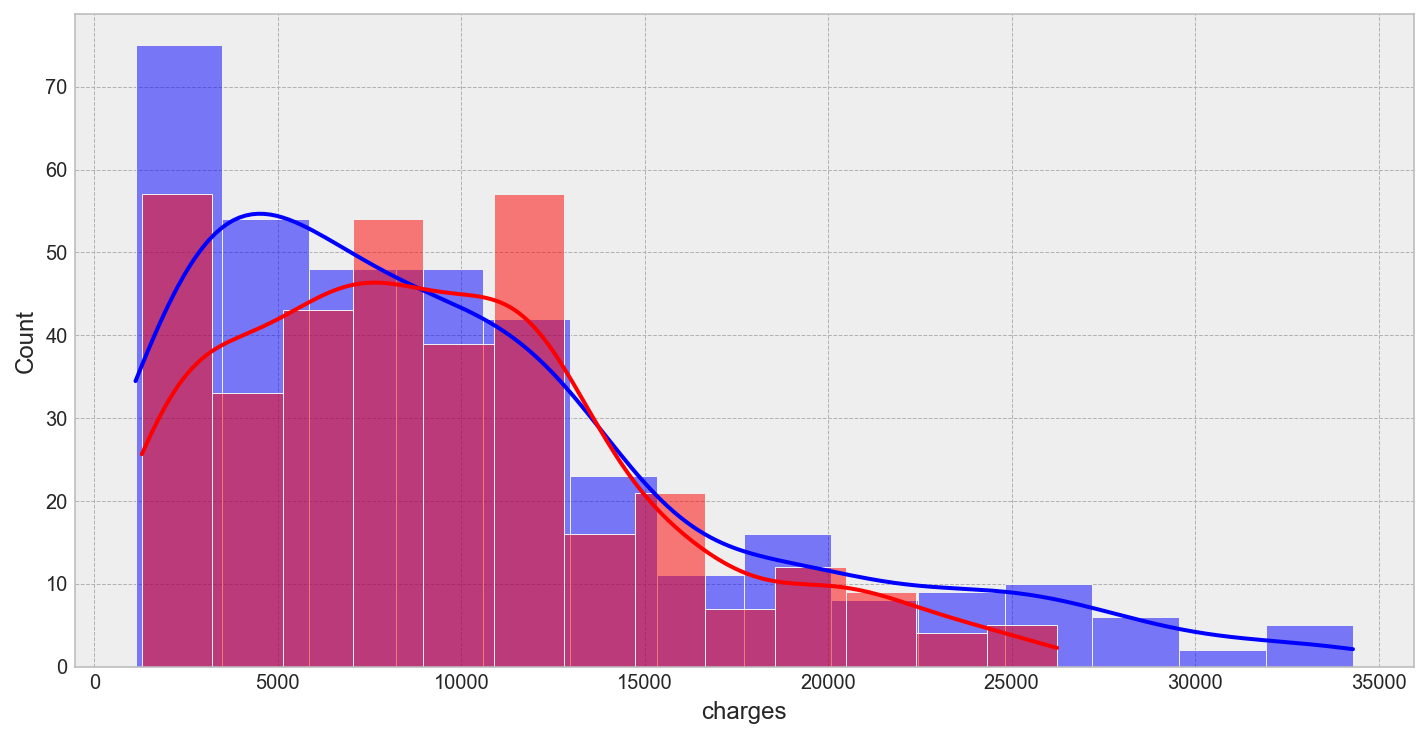

In [69]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [70]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2955.812319901961
Mean Squared Error:  27789182.060049597
Root Mean Squared Error:  5271.5445611366695


### (d). Random Forest Regression

In [71]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [72]:
# Prediction
y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1329,10325.20600,11897.505464
688,26236.57997,9135.995291
136,1261.44200,2614.622475
890,29330.98315,28344.767973
470,2497.03830,2848.030338


In [73]:
Result_df.shape

y_test.shape

Result_df.info()

(357, 2)

(357,)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 1329 to 617
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     357 non-null    float64
 1   Predicted  357 non-null    float64
dtypes: float64(2)
memory usage: 8.4 KB


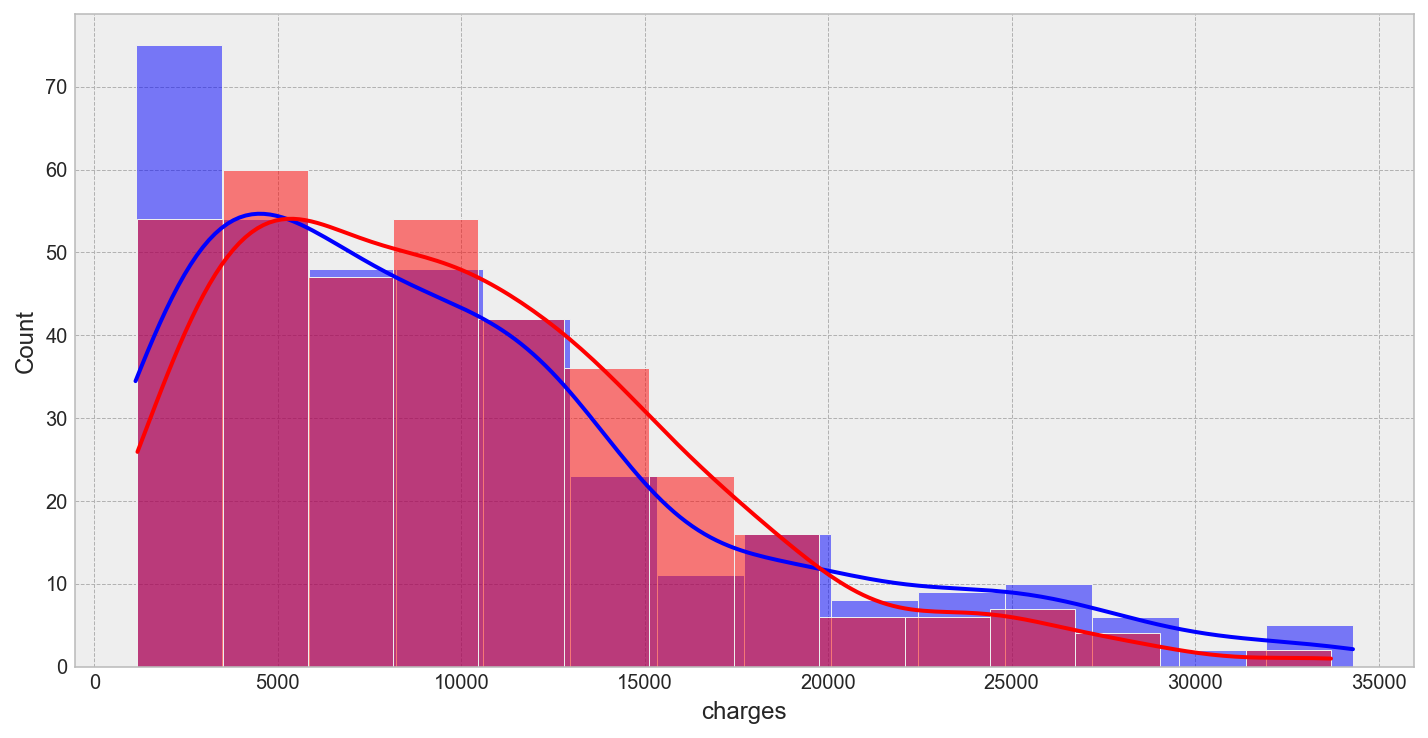

In [74]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [75]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2595.4888889408962
Mean Squared Error:  24570620.892559547
Root Mean Squared Error:  4956.876122373803


### (e). VotingRegressor Regression

In [76]:
from sklearn.ensemble import VotingRegressor
regressor = VotingRegressor([('lr', regressor), ('rf', regressor), ('r3', regressor)])
regressor.fit(X_train_transformed, y_train)

VotingRegressor(estimators=[('lr', RandomForestRegressor()),
                            ('rf', RandomForestRegressor()),
                            ('r3', RandomForestRegressor())])

In [77]:
# Prediction
y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1329,10325.20600,12473.885977
688,26236.57997,8883.154555
136,1261.44200,3320.554945
890,29330.98315,28415.554162
470,2497.03830,2994.832912


In [78]:
Result_df.shape

y_test.shape

Result_df.info()

(357, 2)

(357,)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 1329 to 617
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     357 non-null    float64
 1   Predicted  357 non-null    float64
dtypes: float64(2)
memory usage: 8.4 KB


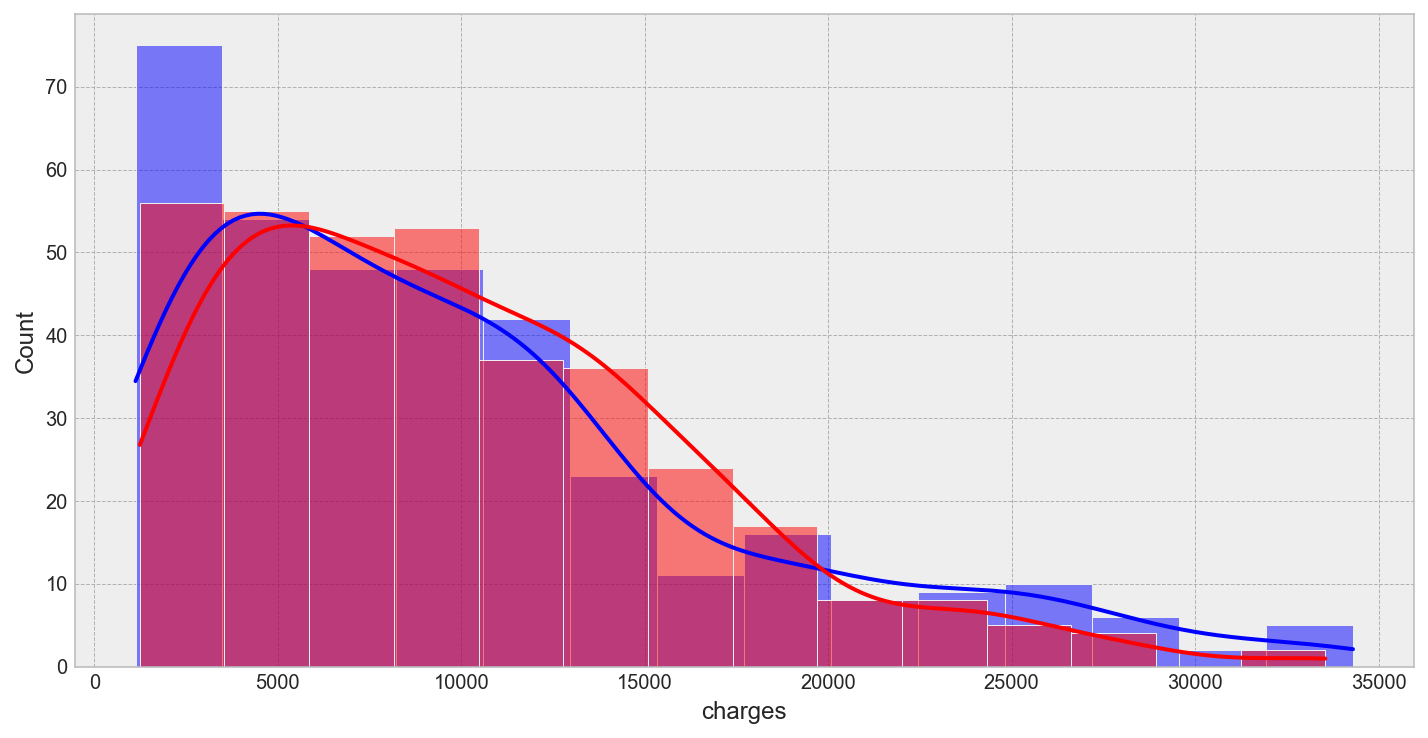

In [79]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [80]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2602.7254517309993
Mean Squared Error:  24299799.395634126
Root Mean Squared Error:  4929.48267018296


### (f). GradientBoostingRegressor Regression

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_transformed, y_train)

GradientBoostingRegressor()

In [82]:
# Prediction
y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
1329,10325.20600,12402.352627
688,26236.57997,8870.207635
136,1261.44200,2262.069217
890,29330.98315,27851.282133
470,2497.03830,3858.372146
455,21797.00040,11635.619068
121,1705.62450,2790.596203
366,13430.26500,16427.510180
603,16085.12750,16416.607801
1107,10493.94580,12656.306180


In [83]:
Result_df.shape

y_test.shape

Result_df.info()

(357, 2)

(357,)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 1329 to 617
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     357 non-null    float64
 1   Predicted  357 non-null    float64
dtypes: float64(2)
memory usage: 8.4 KB


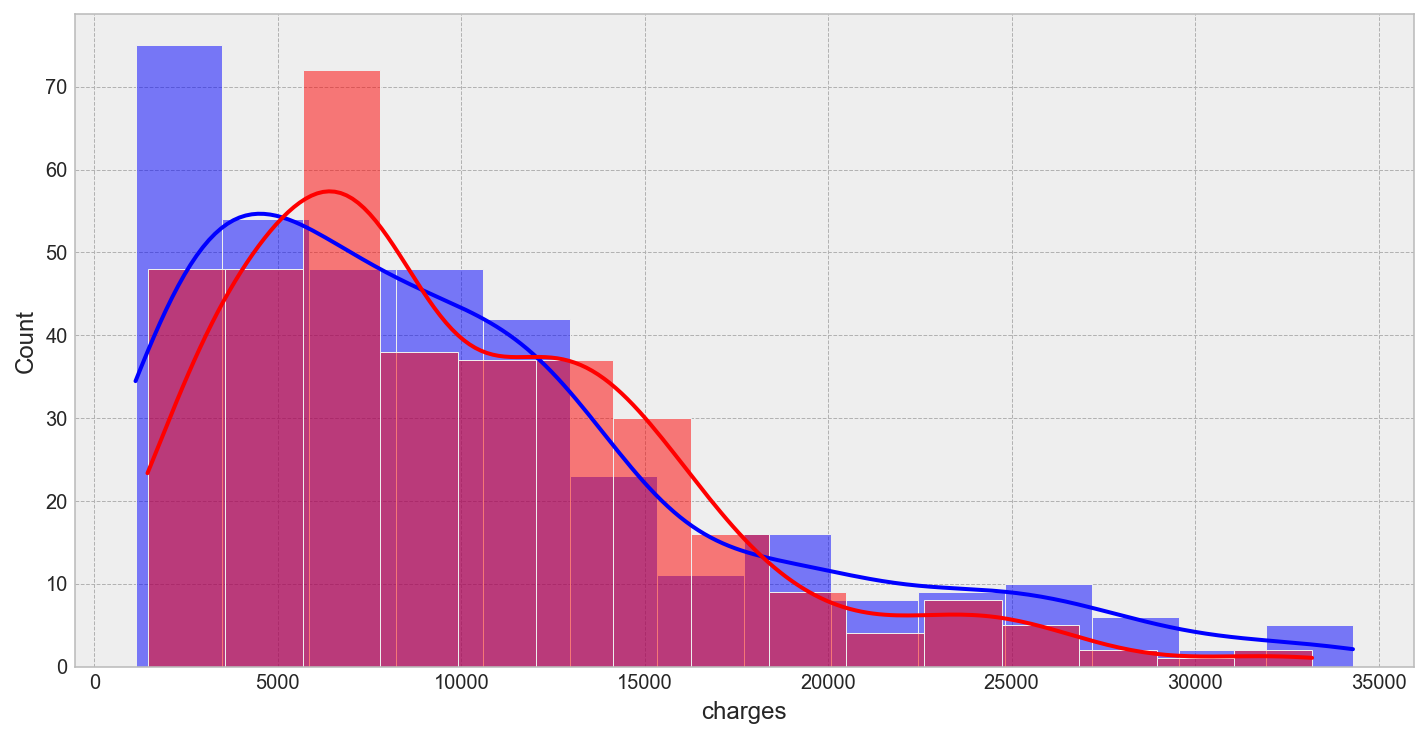

In [84]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [85]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2469.074293747646
Mean Squared Error:  21785003.64374588
Root Mean Squared Error:  4667.4408023825945


### (g). AdaBoostRegressor Regression

In [86]:
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor()
regressor.fit(X_train_transformed, y_train)

AdaBoostRegressor()

In [87]:
# Prediction
y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
1329,10325.20600,11716.241014
688,26236.57997,10251.542081
136,1261.44200,4660.764766
890,29330.98315,26264.274984
470,2497.03830,8237.849465
455,21797.00040,13366.916355
121,1705.62450,4660.764766
366,13430.26500,17431.047286
603,16085.12750,17821.711907
1107,10493.94580,17431.047286


In [88]:
Result_df.shape

y_test.shape

Result_df.info()

(357, 2)

(357,)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 1329 to 617
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     357 non-null    float64
 1   Predicted  357 non-null    float64
dtypes: float64(2)
memory usage: 8.4 KB


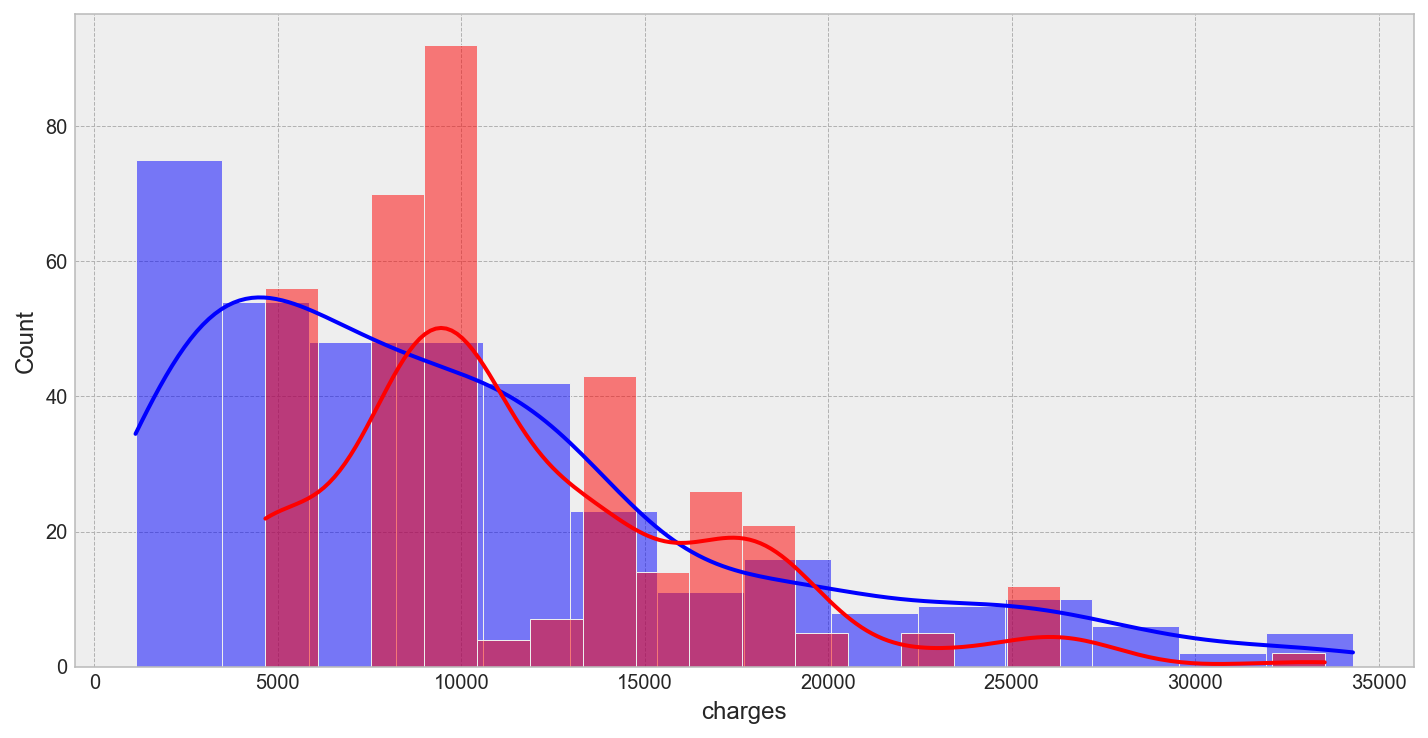

In [89]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [90]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  3842.7354765444907
Mean Squared Error:  25535256.92054789
Root Mean Squared Error:  5053.2422186699


### (h). ExtraTreesRegressor Regression

In [91]:
from sklearn.ensemble import ExtraTreesRegressor
regressor = ExtraTreesRegressor()
regressor.fit(X_train_transformed, y_train)

ExtraTreesRegressor()

In [92]:
# Prediction
y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
1329,10325.20600,10791.534626
688,26236.57997,8729.505444
136,1261.44200,6062.500193
890,29330.98315,28864.607217
470,2497.03830,2452.603512
455,21797.00040,12251.037830
121,1705.62450,1705.789562
366,13430.26500,16578.645036
603,16085.12750,15122.906254
1107,10493.94580,11649.600249


In [93]:
Result_df.shape

y_test.shape

Result_df.info()

(357, 2)

(357,)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 1329 to 617
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     357 non-null    float64
 1   Predicted  357 non-null    float64
dtypes: float64(2)
memory usage: 8.4 KB


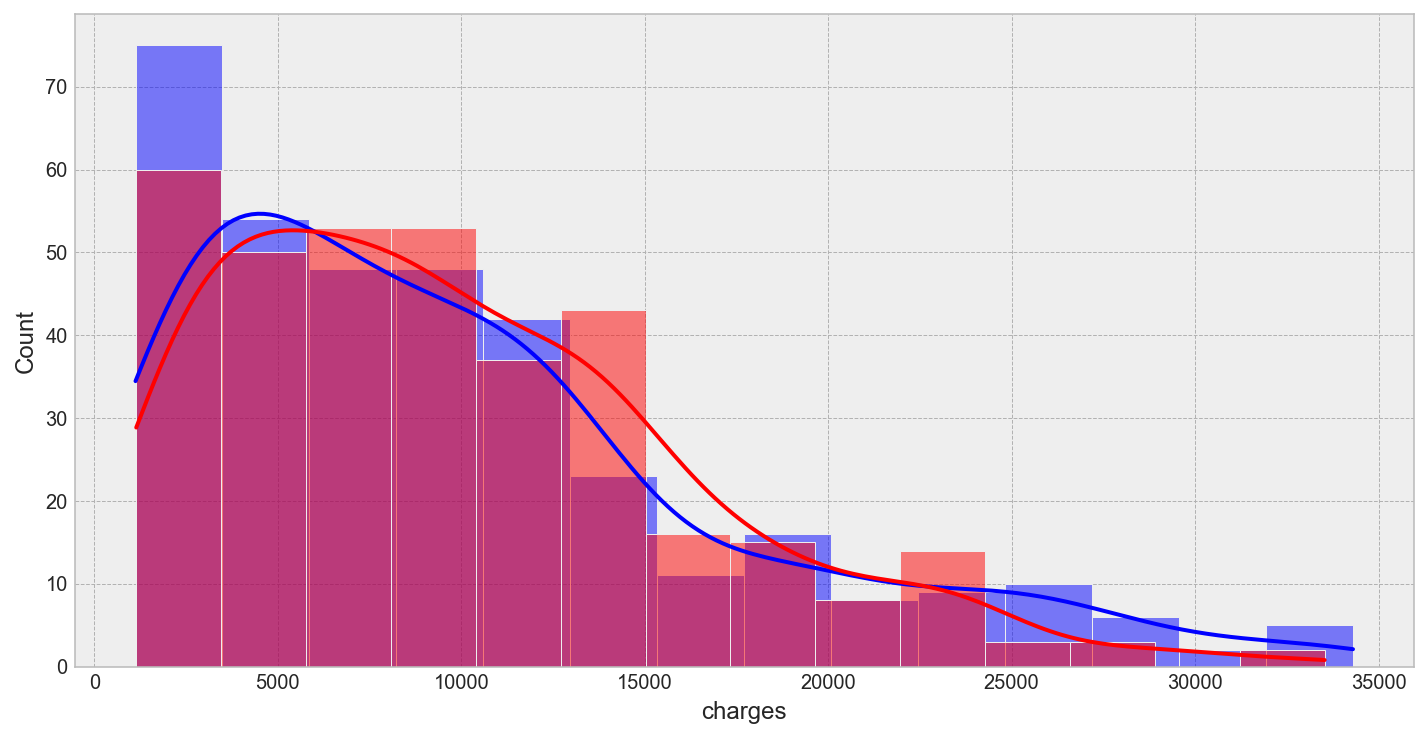

In [94]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [95]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2531.5025517969193
Mean Squared Error:  26947293.894805405
Root Mean Squared Error:  5191.078297888157


### (i). SVR Regression

In [96]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_transformed, y_train)

SVR()

In [97]:
# Prediction
y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
1329,10325.20600,8442.440204
688,26236.57997,8428.969088
136,1261.44200,8345.834937
890,29330.98315,8476.785372
470,2497.03830,8349.844265
455,21797.00040,8469.649897
121,1705.62450,8357.351035
366,13430.26500,8455.307043
603,16085.12750,8455.453102
1107,10493.94580,8438.765291


In [98]:
Result_df.shape

y_test.shape

Result_df.info()

(357, 2)

(357,)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 1329 to 617
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     357 non-null    float64
 1   Predicted  357 non-null    float64
dtypes: float64(2)
memory usage: 8.4 KB


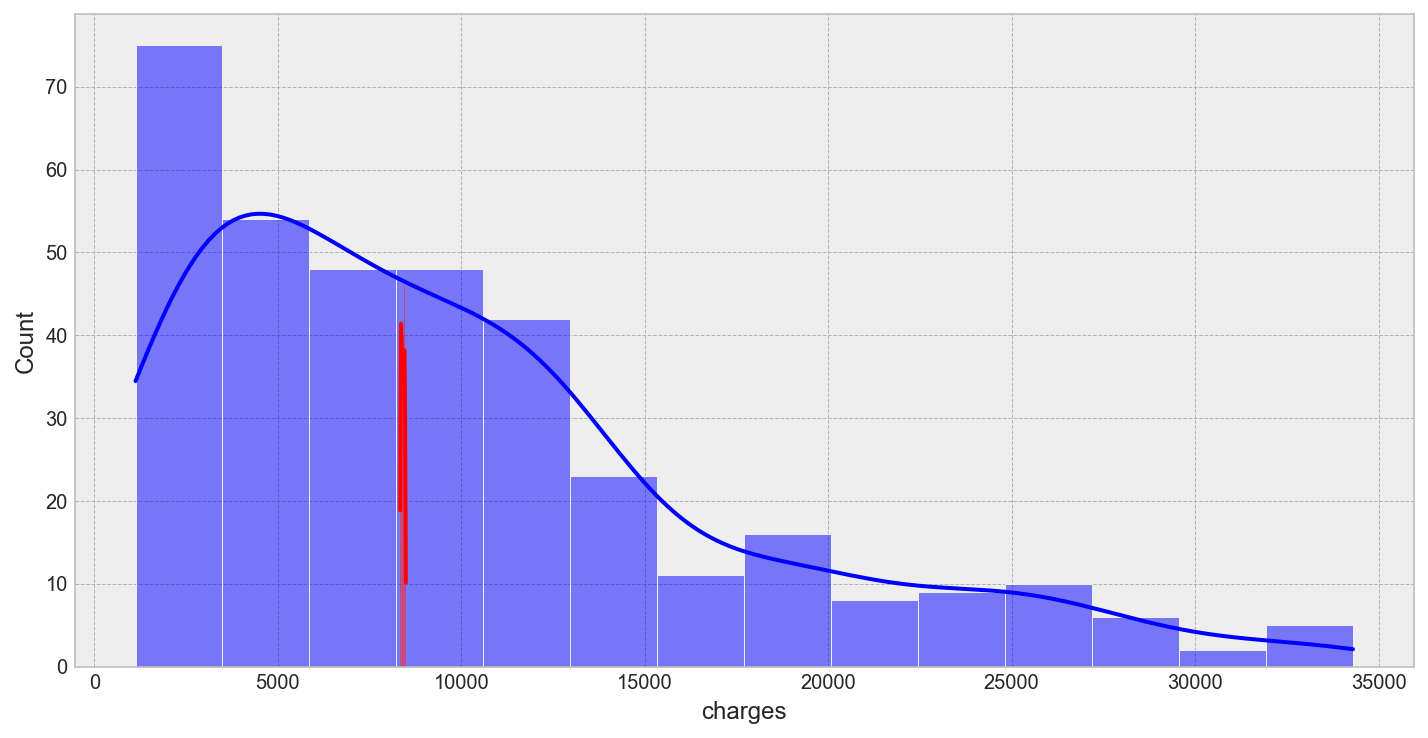

In [99]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde='True')
sns.histplot(y_test_pred, color='red', alpha=0.5, kde='True');

In [100]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  5581.90834194123
Mean Squared Error:  56320604.94631919
Root Mean Squared Error:  7504.705520293198


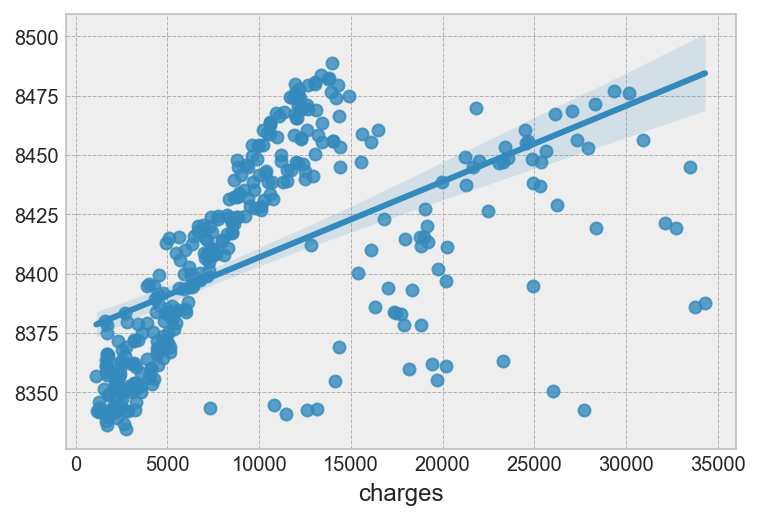

In [101]:
sns.regplot(y_test, y_test_pred)
plt.show;

### Result

In [103]:
df = {'Best_algorithm':['2','6','7','4','5','1','8','3','9'],
      'Regression_algorithm':['LinearRegression Regression','DecisionTreeRegressor Regression','KNeighborsRegressor Regression',
                        'RandomForestRegressor Regression','VotingRegressor Regression','GradientBoostingRegressor Regression',
                       'AdaBoostRegressor Regression','ExtraTreesRegressor Regression','SVR Regression'],
      'Mean_absolute_error': ['2495.678','2911.316','2955.812','2595.488','2602.725','2469.074','3842.735','2531.502','5581.908']}

Result = pd.DataFrame(df, columns = ['Best_algorithm','Regression_algorithm','Mean_absolute_error'])
Result

,Best_algorithm,Regression_algorithm,Mean_absolute_error
0,2,LinearRegression Regression,2495.678
1,6,DecisionTreeRegressor Regression,2911.316
2,7,KNeighborsRegressor Regression,2955.812
3,4,RandomForestRegressor Regression,2595.488
4,5,VotingRegressor Regression,2602.725
5,1,GradientBoostingRegressor Regression,2469.074
6,8,AdaBoostRegressor Regression,3842.735
7,3,ExtraTreesRegressor Regression,2531.502
8,9,SVR Regression,5581.908


## Conclusion:

(1). **After removing outliers i conclude that GBDT model is best fit model for the prediction**

(2)From the avobe senario we conclude that **GradientBoostingRegressor** predicting more accuratly with less amount of 
**mean absolute error: 2438.457** than any other model. so we can say that this is the best model for prediction of insurance 
charges.

In [ ]:
df 